# <center>**Atividade Integradora**</center>

**<center> Contextualização </center>**

O projeto integrador de 2023 consiste em construir um pipeline completo de pré-processamento de dados e construção de modelo preditivo de classificação, voltado para predizer se uma empresa irá deixar de operar em até dois anos.
    
Os dados foram coletados e curados pela Bisnode, uma empresa europeia do ramo de business information.

São dados entre os anos de 2005 e 2016, com empresas em alguns segmentos da economia (como produtos eletrônicos, equipamentos elétricos, motores, etc.) e serviços (alimentação, bebidas e hospedagem). Empresas que possuem receita acima de 100 milhões de Euro foram remotivdas para fins de mininizar as possibilidades de identificação.

## Bibliotecas

Todas as bibliotecas utilizadas no projeto.

In [21]:
# Importando bibliotecas

import pandas as pd
import numpy as np
import missingno as msno
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

## Pré Processamento

Importando arquivo para um data frame com pandas.

In [22]:
# Lendo arquivo csv

df_bisnode = pd.read_csv("cs_bisnode_panel.csv")

df_bisnode.head()

,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,finished_prod,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,net_dom_sales,net_exp_sales,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,wages,D,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
0,1001034.000,2005-01-01,2005-12-31,NaN,692.593,7266.667,7574.074,0.000,0.000,0.000,NaN,1229.630,218.519,0.000,4355.556,2911.111,38222.223,NaN,NaN,22222.223,62.963,62751.852,881.482,1388.889,1229.630,NaN,NaN,0,364,0,2005,1990.000,NaN,2.000,0.000,0.500,1968.000,5686.500,mix,Domestic,5630.000,56.000,3.000,1,Central,1990-11-19,NaN,NaN
1,1001034.000,2006-01-01,2006-12-31,NaN,603.704,13122.223,12211.111,0.000,0.000,0.000,NaN,725.926,996.296,0.000,7225.926,5896.296,38140.742,NaN,NaN,23844.445,755.556,64625.926,1637.037,1388.889,725.926,NaN,NaN,0,364,0,2006,1990.000,NaN,2.000,0.000,0.500,1968.000,5686.500,mix,Domestic,5630.000,56.000,3.000,1,Central,1990-11-19,NaN,NaN
2,1001034.000,2007-01-01,2007-12-31,NaN,425.926,8196.296,7800.000,0.000,0.000,0.000,NaN,1322.222,570.370,0.000,7951.852,177.778,40174.074,NaN,NaN,22262.963,0.000,65100.000,1633.333,1388.889,1322.222,NaN,NaN,0,364,0,2007,1990.000,NaN,2.000,0.000,0.500,1968.000,5686.500,mix,Domestic,5630.000,56.000,3.000,1,Central,1990-11-19,NaN,NaN
3,1001034.000,2008-01-01,2008-12-31,NaN,300.000,8485.186,7781.481,0.000,0.000,0.000,NaN,1022.222,714.815,0.000,5233.333,1392.593,54274.074,NaN,NaN,21107.408,0.000,78085.188,1725.926,1481.481,1022.222,NaN,NaN,0,365,0,2008,1990.000,NaN,2.000,0.000,0.500,1968.000,5686.500,mix,Domestic,5630.000,56.000,3.000,1,Central,1990-11-19,NaN,NaN
4,1001034.000,2009-01-01,2009-12-31,NaN,207.407,5137.037,15300.000,0.000,0.000,0.000,NaN,814.815,-11044.444,0.000,3259.259,11.111,41755.555,NaN,NaN,13237.037,-11074.074,45388.891,-9348.148,1481.481,814.815,NaN,NaN,0,364,0,2009,1990.000,NaN,2.000,0.000,0.500,1968.000,5686.500,mix,Domestic,5630.000,56.000,3.000,1,Central,1990-11-19,NaN,0.083


Obtendo as principais informações

In [23]:
df_bisnode.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 287829 entries, 0 to 287828
Data columns (total 48 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   comp_id               287829 non-null  float64
 1   begin                 287829 non-null  object 
 2   end                   287829 non-null  object 
 3   COGS                  18257 non-null   float64
 4   amort                 279789 non-null  float64
 5   curr_assets           287698 non-null  float64
 6   curr_liab             287698 non-null  float64
 7   extra_exp             269300 non-null  float64
 8   extra_inc             269300 non-null  float64
 9   extra_profit_loss     270626 non-null  float64
 10  finished_prod         17485 non-null   float64
 11  fixed_assets          287698 non-null  float64
 12  inc_bef_tax           280392 non-null  float64
 13  intang_assets         287689 non-null  float64
 14  inventories           287698 non-null  float64
 15  

### **Requisitos**

- Remover as colunas: ['COGS', 'finished_prod', 'net_dom_sales', 'net_exp_sales', 'wages', 'D'], pois elas apresentam um percentual considerável de missing data

In [24]:
# Criando função que retorna o percentual de missing data do dataframe

def missing_data_df(df):
    """
    Função que retorna o percentual de dados faltantes de um dataframe
    """
    # Contando o numero de linhas sem dado
    missing_count = df.isnull().sum()

    # Calculando o percentual com base no numero total de linhas do dataframe
    missing_percentage = (missing_count / len(df))*100

    missing_percentage = missing_percentage.sort_values(ascending=False)

    return missing_percentage


# Executando função para o dataframe
missing_data_df(df_bisnode).head(10)

D               100.000
finished_prod    93.925
wages            93.752
COGS             93.657
net_exp_sales    93.657
net_dom_sales    93.657
exit_year        86.499
exit_date        80.481
labor_avg        50.909
birth_year       38.849
dtype: float64

In [25]:
# Retirando colunas

df_bisnode = df_bisnode.drop(columns=['COGS', 'finished_prod', 'net_dom_sales', 'net_exp_sales', 'wages', 'D'], axis=1)

# Visualizando alterações

missing_data_df(df_bisnode).head(10)


exit_year      86.499
exit_date      80.481
labor_avg      50.909
birth_year     38.849
founded_year   19.615
gender         19.604
origin         19.604
female         19.604
foreign        19.604
ceo_count      19.604
dtype: float64

Observando valores faltantes com a biblioteca missigno.

<Axes: >

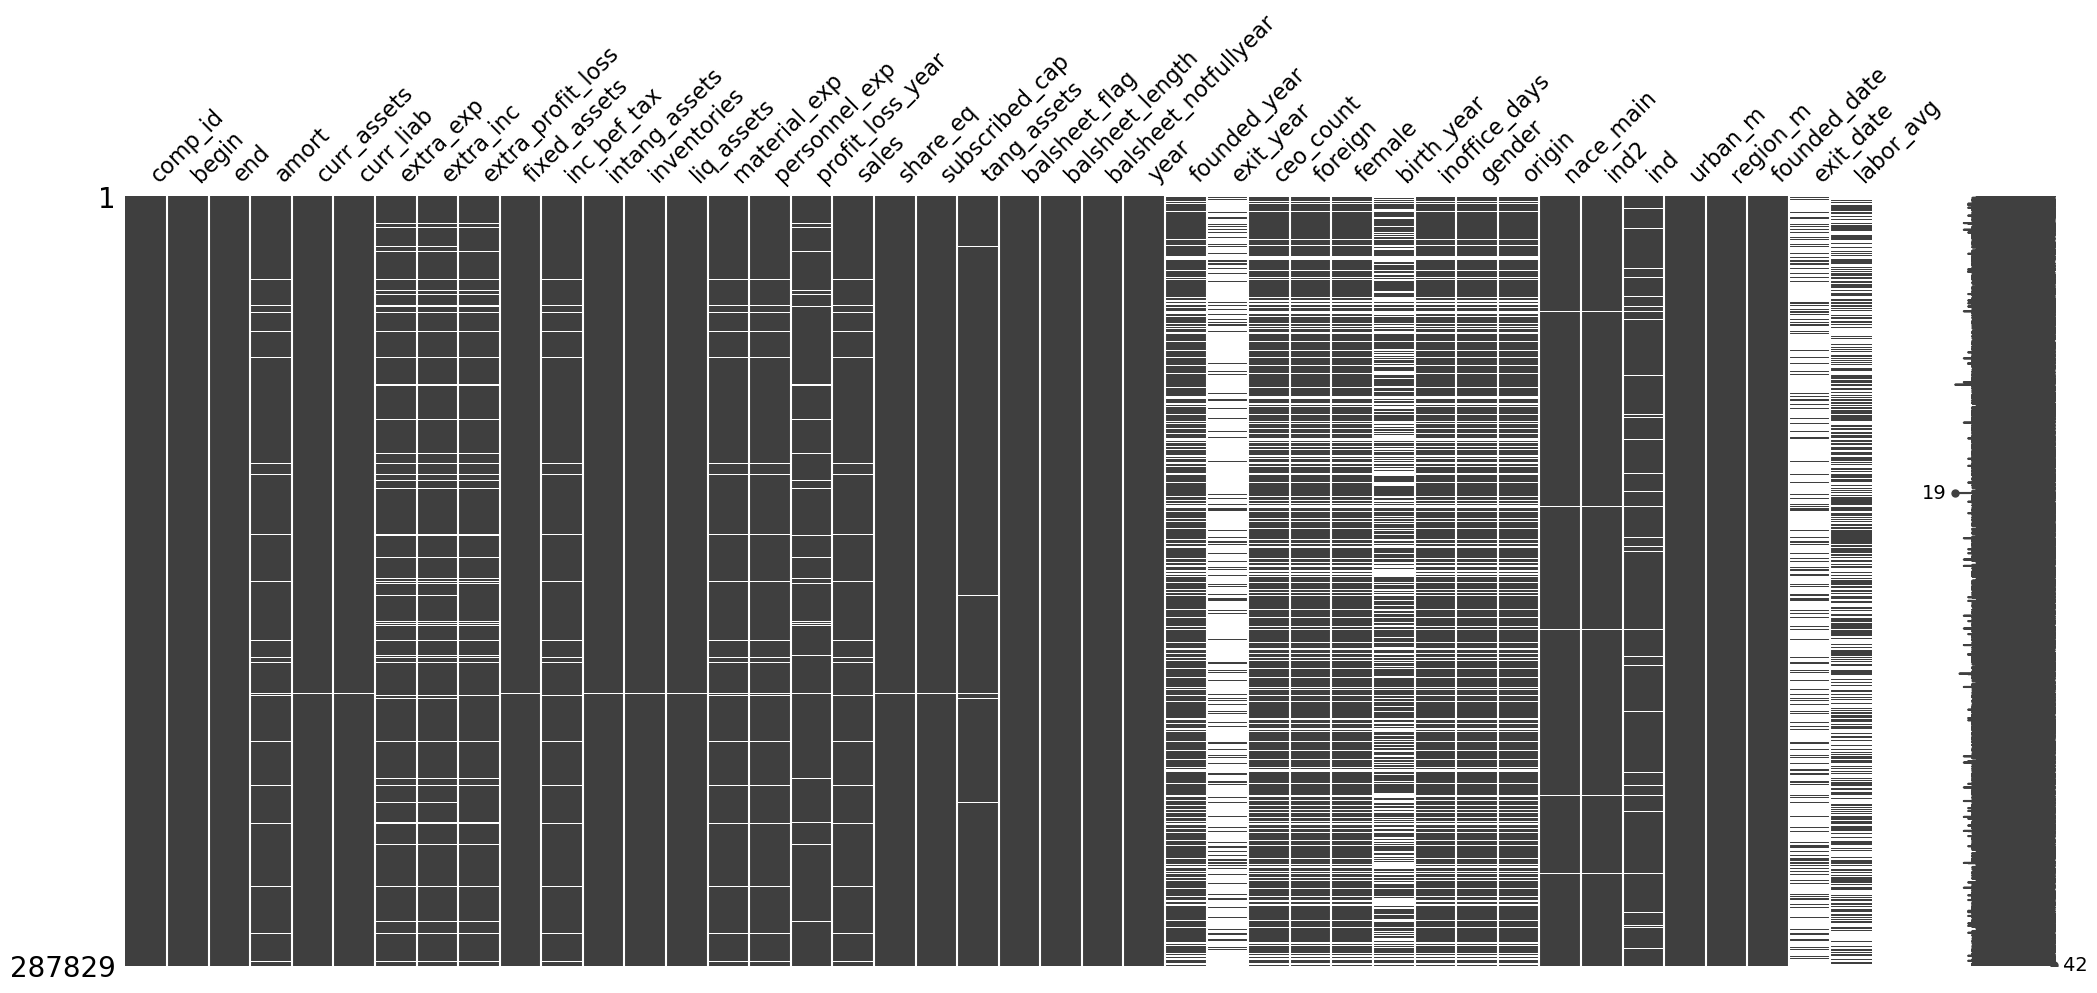

In [26]:
msno.matrix(df_bisnode)

Como pode ser observado, ainda existem colunas com um alto percentual de missing values.

- Remova de seus dados os registros do ano de 2016

In [27]:
# Removendo linhas com registro de 2016
df_bisnode = df_bisnode[df_bisnode['year'] != 2016]

- Será preciso criar uma coluna da variável dependente que será objeto da predição.
Para isso, use o conceito de que uma empresa deixou de operar se ela esteve ativa no
ano X, mas não apresentou vendas em X + 2 anos.

In [28]:
df_bisnode.loc[(df_bisnode['comp_id'] == 1001034)]

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg
0,1001034.000,2005-01-01,2005-12-31,692.593,7266.667,7574.074,0.000,0.000,0.000,1229.630,218.519,0.000,4355.556,2911.111,38222.223,22222.223,62.963,62751.852,881.482,1388.889,1229.630,0,364,0,2005,1990.000,NaN,2.000,0.000,0.500,1968.000,5686.500,mix,Domestic,5630.000,56.000,3.000,1,Central,1990-11-19,NaN,NaN
1,1001034.000,2006-01-01,2006-12-31,603.704,13122.223,12211.111,0.000,0.000,0.000,725.926,996.296,0.000,7225.926,5896.296,38140.742,23844.445,755.556,64625.926,1637.037,1388.889,725.926,0,364,0,2006,1990.000,NaN,2.000,0.000,0.500,1968.000,5686.500,mix,Domestic,5630.000,56.000,3.000,1,Central,1990-11-19,NaN,NaN
2,1001034.000,2007-01-01,2007-12-31,425.926,8196.296,7800.000,0.000,0.000,0.000,1322.222,570.370,0.000,7951.852,177.778,40174.074,22262.963,0.000,65100.000,1633.333,1388.889,1322.222,0,364,0,2007,1990.000,NaN,2.000,0.000,0.500,1968.000,5686.500,mix,Domestic,5630.000,56.000,3.000,1,Central,1990-11-19,NaN,NaN
3,1001034.000,2008-01-01,2008-12-31,300.000,8485.186,7781.481,0.000,0.000,0.000,1022.222,714.815,0.000,5233.333,1392.593,54274.074,21107.408,0.000,78085.188,1725.926,1481.481,1022.222,0,365,0,2008,1990.000,NaN,2.000,0.000,0.500,1968.000,5686.500,mix,Domestic,5630.000,56.000,3.000,1,Central,1990-11-19,NaN,NaN
4,1001034.000,2009-01-01,2009-12-31,207.407,5137.037,15300.000,0.000,0.000,0.000,814.815,-11044.444,0.000,3259.259,11.111,41755.555,13237.037,-11074.074,45388.891,-9348.148,1481.481,814.815,0,364,0,2009,1990.000,NaN,2.000,0.000,0.500,1968.000,5686.500,mix,Domestic,5630.000,56.000,3.000,1,Central,1990-11-19,NaN,0.083
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,1001034.000,2011-01-01,2011-12-31,155.556,3607.407,22555.555,0.000,0.000,0.000,481.481,-1570.370,0.000,0.000,1633.333,200.000,225.926,-1570.370,0.000,-18466.666,1481.481,481.481,0,364,0,2011,1990.000,NaN,2.000,0.000,0.500,1954.000,4895.500,mix,Domestic,5630.000,56.000,3.000,1,Central,1990-11-19,NaN,0.083
7,1001034.000,2012-01-01,2012-12-31,140.741,148.148,21429.629,0.000,0.000,0.000,340.741,-2474.074,0.000,0.000,25.926,1862.963,285.185,-2474.074,0.000,-20940.740,1481.481,340.741,0,365,0,2012,1990.000,NaN,2.000,0.000,0.500,1954.000,4895.500,mix,Domestic,5630.000,56.000,3.000,1,Central,1990-11-19,NaN,0.083
8,1001034.000,2013-01-01,2013-12-31,140.741,140.741,21851.852,0.000,0.000,0.000,200.000,-614.815,0.000,0.000,37.037,177.778,296.296,-633.333,0.000,-21574.074,1481.481,200.000,0,364,0,2013,1990.000,NaN,2.000,0.000,0.500,1954.000,4895.500,mix,Domestic,5630.000,56.000,3.000,1,Central,1990-11-19,NaN,NaN
9,1001034.000,2014-01-01,2014-12-31,29.630,144.444,22340.740,0.000,0.000,0.000,170.370,-448.148,0.000,0.000,40.741,114.815,303.704,-448.148,0.000,-22025.926,1481.481,170.370,0,364,0,2014,1990.000,NaN,2.000,0.000,0.500,1954.000,4895.500,mix,Domestic,5630.000,56.000,3.000,1,Central,1990-11-19,NaN,NaN


In [29]:
df_bisnode.loc[(df_bisnode['comp_id'] == 1001034), "year"].to_list()

[2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015]

In [30]:
# Criando função que verifica o ano da linha mais 2 anos para o futuro.
def preditora(row):
    lista_years = df_bisnode.loc[(df_bisnode['comp_id'] == row['comp_id']), "year"].to_list()

    if (row["year"]+2) in lista_years:
        return 0
    else:
        return 1


# Criando coluna de preditora aplicando a função criada
df_bisnode['preditora'] = df_bisnode.apply(preditora, axis=1)

Conferindo aleatoriamente o resultado da função acima para três diferentes empresas escolhidas aleatóriamente.

In [31]:
# Conferindo aplicação do código

df_bisnode[df_bisnode['comp_id'] == 1001034.0]

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,preditora
0,1001034.000,2005-01-01,2005-12-31,692.593,7266.667,7574.074,0.000,0.000,0.000,1229.630,218.519,0.000,4355.556,2911.111,38222.223,22222.223,62.963,62751.852,881.482,1388.889,1229.630,0,364,0,2005,1990.000,NaN,2.000,0.000,0.500,1968.000,5686.500,mix,Domestic,5630.000,56.000,3.000,1,Central,1990-11-19,NaN,NaN,0
1,1001034.000,2006-01-01,2006-12-31,603.704,13122.223,12211.111,0.000,0.000,0.000,725.926,996.296,0.000,7225.926,5896.296,38140.742,23844.445,755.556,64625.926,1637.037,1388.889,725.926,0,364,0,2006,1990.000,NaN,2.000,0.000,0.500,1968.000,5686.500,mix,Domestic,5630.000,56.000,3.000,1,Central,1990-11-19,NaN,NaN,0
2,1001034.000,2007-01-01,2007-12-31,425.926,8196.296,7800.000,0.000,0.000,0.000,1322.222,570.370,0.000,7951.852,177.778,40174.074,22262.963,0.000,65100.000,1633.333,1388.889,1322.222,0,364,0,2007,1990.000,NaN,2.000,0.000,0.500,1968.000,5686.500,mix,Domestic,5630.000,56.000,3.000,1,Central,1990-11-19,NaN,NaN,0
3,1001034.000,2008-01-01,2008-12-31,300.000,8485.186,7781.481,0.000,0.000,0.000,1022.222,714.815,0.000,5233.333,1392.593,54274.074,21107.408,0.000,78085.188,1725.926,1481.481,1022.222,0,365,0,2008,1990.000,NaN,2.000,0.000,0.500,1968.000,5686.500,mix,Domestic,5630.000,56.000,3.000,1,Central,1990-11-19,NaN,NaN,0
4,1001034.000,2009-01-01,2009-12-31,207.407,5137.037,15300.000,0.000,0.000,0.000,814.815,-11044.444,0.000,3259.259,11.111,41755.555,13237.037,-11074.074,45388.891,-9348.148,1481.481,814.815,0,364,0,2009,1990.000,NaN,2.000,0.000,0.500,1968.000,5686.500,mix,Domestic,5630.000,56.000,3.000,1,Central,1990-11-19,NaN,0.083,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6,1001034.000,2011-01-01,2011-12-31,155.556,3607.407,22555.555,0.000,0.000,0.000,481.481,-1570.370,0.000,0.000,1633.333,200.000,225.926,-1570.370,0.000,-18466.666,1481.481,481.481,0,364,0,2011,1990.000,NaN,2.000,0.000,0.500,1954.000,4895.500,mix,Domestic,5630.000,56.000,3.000,1,Central,1990-11-19,NaN,0.083,0
7,1001034.000,2012-01-01,2012-12-31,140.741,148.148,21429.629,0.000,0.000,0.000,340.741,-2474.074,0.000,0.000,25.926,1862.963,285.185,-2474.074,0.000,-20940.740,1481.481,340.741,0,365,0,2012,1990.000,NaN,2.000,0.000,0.500,1954.000,4895.500,mix,Domestic,5630.000,56.000,3.000,1,Central,1990-11-19,NaN,0.083,0
8,1001034.000,2013-01-01,2013-12-31,140.741,140.741,21851.852,0.000,0.000,0.000,200.000,-614.815,0.000,0.000,37.037,177.778,296.296,-633.333,0.000,-21574.074,1481.481,200.000,0,364,0,2013,1990.000,NaN,2.000,0.000,0.500,1954.000,4895.500,mix,Domestic,5630.000,56.000,3.000,1,Central,1990-11-19,NaN,NaN,0
9,1001034.000,2014-01-01,2014-12-31,29.630,144.444,22340.740,0.000,0.000,0.000,170.370,-448.148,0.000,0.000,40.741,114.815,303.704,-448.148,0.000,-22025.926,1481.481,170.370,0,364,0,2014,1990.000,NaN,2.000,0.000,0.500,1954.000,4895.500,mix,Domestic,5630.000,56.000,3.000,1,Central,1990-11-19,NaN,NaN,1


In [32]:
df_bisnode_2012 = df_bisnode[df_bisnode['year'] == 2012]

In [33]:
df_bisnode_2012.head()

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,preditora
7,1001034.000,2012-01-01,2012-12-31,140.741,148.148,21429.629,0.000,0.000,0.000,340.741,-2474.074,0.000,0.000,25.926,1862.963,285.185,-2474.074,0.000,-20940.740,1481.481,340.741,0,365,0,2012,1990.000,NaN,2.000,0.000,0.500,1954.000,4895.500,mix,Domestic,5630.000,56.000,3.000,1,Central,1990-11-19,NaN,0.083,0
14,1001541.000,2012-01-01,2012-12-31,481.481,9629.630,1303.704,0.000,0.000,0.000,190566.672,-7696.296,0.000,0.000,9048.148,8351.852,0.000,-7722.222,1203.704,191262.969,200740.734,190566.672,0,365,0,2012,2008.000,NaN,1.000,0.000,0.000,1974.000,3222.000,male,Domestic,5610.000,56.000,3.000,3,Central,2008-02-24,NaN,NaN,0
23,1002029.000,2012-01-01,2012-12-31,14929.630,203885.188,120444.453,0.000,0.000,0.000,23459.260,11818.519,0.000,677.778,15077.777,984270.375,41037.035,9722.223,1136514.875,93144.445,11111.111,23459.260,0,365,0,2012,2006.000,NaN,2.000,0.000,0.000,1975.000,3101.000,male,Domestic,2711.000,27.000,2.000,3,East,2006-07-03,NaN,0.458,0
35,1003200.000,2012-01-01,2012-12-31,25.926,22.222,10996.296,0.000,0.000,0.000,0.000,-2337.037,0.000,0.000,22.222,1933.333,1355.556,-2340.741,2785.185,-23785.186,1851.852,0.000,0,365,0,2012,2003.000,2014.000,2.000,0.000,1.000,NaN,1754.000,female,Domestic,5630.000,56.000,3.000,1,Central,2003-10-21,2014-08-09,NaN,1
48,1007261.000,2012-01-01,2012-12-31,0.000,255.556,9207.407,0.000,0.000,0.000,0.000,-4670.371,0.000,0.000,255.556,0.000,4670.371,-4670.371,0.000,-8951.852,1851.852,0.000,0,365,0,2012,2010.000,2015.000,1.000,0.000,0.000,1962.000,1539.000,male,Domestic,5610.000,56.000,3.000,1,Central,2010-08-26,2015-11-19,0.083,1


In [34]:
df_bisnode_2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28469 entries, 7 to 287825
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   comp_id               28469 non-null  float64
 1   begin                 28469 non-null  object 
 2   end                   28469 non-null  object 
 3   amort                 27377 non-null  float64
 4   curr_assets           28449 non-null  float64
 5   curr_liab             28449 non-null  float64
 6   extra_exp             27446 non-null  float64
 7   extra_inc             27446 non-null  float64
 8   extra_profit_loss     27446 non-null  float64
 9   fixed_assets          28449 non-null  float64
 10  inc_bef_tax           27446 non-null  float64
 11  intang_assets         28449 non-null  float64
 12  inventories           28449 non-null  float64
 13  liq_assets            28449 non-null  float64
 14  material_exp          27377 non-null  float64
 15  personnel_exp     

In [35]:
len(df_bisnode_2012['comp_id'].value_counts())

28469

In [36]:
df_bisnode_2012['preditora'].value_counts()

0    23909
1     4560
Name: preditora, dtype: int64

In [37]:
df_bisnode_2012[df_bisnode_2012['exit_year'] == 2012]['preditora'].value_counts()

1    61
Name: preditora, dtype: int64

In [38]:
df_bisnode_2012[df_bisnode_2012['exit_year'] == 2013]['preditora'].value_counts()

1    244
0      1
Name: preditora, dtype: int64

In [39]:
df_bisnode[df_bisnode['comp_id'] == 243240779776.000]

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,preditora
209019,243240779776.000,2010-01-01,2010-12-31,18825.926,5440.741,2444.444,0.000,0.000,0.000,37740.742,-47644.445,0.000,0.000,2033.333,29577.777,12348.148,-47644.445,13759.259,-43940.742,3703.704,37740.742,0,364,0,2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5630.000,56.000,3.000,1,Central,2010-03-11,2013-12-31,0.250,0
209020,243240779776.000,2011-01-01,2011-12-31,3459.259,11137.037,4374.074,0.000,0.000,0.000,1111.111,-44329.629,0.000,0.000,3451.852,30100.000,2722.222,-44374.074,25725.926,-88314.812,3703.704,0.000,0,364,0,2011,2010.000,2013.000,1.000,1.000,0.000,NaN,2480.000,male,Foreign,5630.000,56.000,3.000,1,Central,2010-03-11,2013-12-31,0.167,0
209021,243240779776.000,2012-01-01,2012-12-31,0.000,10359.259,9948.148,0.000,0.000,0.000,1111.111,-15074.074,0.000,0.000,5455.556,40322.223,0.000,-15125.926,25881.482,-103444.453,3703.704,0.000,0,365,0,2012,2010.000,2013.000,1.000,1.000,0.000,NaN,2480.000,male,Foreign,5630.000,56.000,3.000,1,Central,2010-03-11,2013-12-31,0.167,0
209022,243240779776.000,2013-01-01,2013-12-31,0.000,20114.814,47488.891,0.000,76822.219,76822.219,1111.111,80414.812,0.000,0.000,8892.593,21537.037,0.000,76392.594,28940.740,-27051.852,3703.704,0.000,0,364,0,2013,2010.000,2013.000,1.000,1.000,0.000,NaN,2480.000,male,Foreign,5630.000,56.000,3.000,1,Central,2010-03-11,2013-12-31,NaN,1
209023,243240779776.000,2014-01-01,2014-01-01,NaN,20114.814,47488.891,NaN,NaN,NaN,1111.111,NaN,0.000,0.000,8892.593,NaN,NaN,0.000,NaN,-27051.852,3703.704,0.000,0,0,1,2014,2010.000,2013.000,1.000,1.000,0.000,NaN,2480.000,male,Foreign,5630.000,56.000,3.000,1,Central,2010-03-11,2013-12-31,NaN,1


Remover registros onde o valor da coluna "exit_year" é menor que 2012 e preditora é 0

In [40]:
df_bisnode_2012[(df_bisnode_2012['exit_year'] < 2012) & (df_bisnode_2012['preditora'] == 0)]

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,preditora
100038,55234965504.000,2012-01-01,2012-12-31,0.000,9100.000,174.074,0.000,0.000,0.000,2962.963,240.741,0.000,1081.481,7025.926,14033.333,4807.407,218.519,19733.334,11240.741,11111.111,2962.963,0,365,0,2012,1996.000,1998.000,1.000,0.000,0.000,1948.000,3955.000,male,Domestic,5610.000,56.000,3.000,3,East,1996-03-04,1998-06-21,0.129,0
108773,65181343744.000,2012-01-01,2012-12-31,2292.593,2325.926,36274.074,0.000,0.000,0.000,46540.742,1237.037,0.000,288.889,1248.148,5948.148,9414.814,1170.370,19796.297,12222.223,148.148,46540.742,0,365,0,2012,1989.000,1997.000,2.000,0.000,0.000,1963.000,2871.500,male,Domestic,5510.000,55.000,3.000,2,East,1989-09-12,1997-12-03,0.083,0
184431,189176233984.000,2012-01-01,2012-12-31,NaN,0.000,0.000,NaN,NaN,NaN,0.000,NaN,0.000,0.000,0.000,NaN,NaN,0.000,NaN,0.000,851.852,0.000,0,365,0,2012,1992.000,1998.000,1.000,0.000,1.000,1934.000,6886.000,female,Domestic,5510.000,55.000,3.000,3,East,1992-09-01,1998-09-07,NaN,0


In [41]:
indexExit = df_bisnode_2012[(df_bisnode_2012['exit_year'] < 2012) & (df_bisnode_2012['preditora'] == 0)].index
df_bisnode_2012.drop(indexExit , inplace=True)
df_bisnode_2012[(df_bisnode_2012['exit_year'] < 2012) & (df_bisnode_2012['preditora'] == 0)]

/tmp/ipykernel_937/3981866290.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_bisnode_2012.drop(indexExit , inplace=True)


,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,preditora


Marcar como "preditora" == 1 onde o exit_year é 2013 ou 2014

In [42]:
df_bisnode_2012[(df_bisnode_2012['exit_year'] == 2013) & (df_bisnode_2012['preditora'] == 0)]

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,preditora
209021,243240779776.000,2012-01-01,2012-12-31,0.000,10359.259,9948.148,0.000,0.000,0.000,1111.111,-15074.074,0.000,0.000,5455.556,40322.223,0.000,-15125.926,25881.482,-103444.453,3703.704,0.000,0,365,0,2012,2010.000,2013.000,1.000,1.000,0.000,NaN,2480.000,male,Foreign,5630.000,56.000,3.000,1,Central,2010-03-11,2013-12-31,0.167,0


In [43]:
df_bisnode_2012.loc[(df_bisnode_2012['exit_year'] == 2013) & (df_bisnode_2012['preditora'] == 0), 'preditora'] = 1

In [44]:
df_bisnode_2012[(df_bisnode_2012['exit_year'] == 2013) & (df_bisnode_2012['preditora'] == 0)]

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,preditora


In [45]:
df_bisnode_2012[(df_bisnode_2012['exit_year'] == 2014) & (df_bisnode_2012['preditora'] == 0)]

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,preditora
2178,27839636.000,2012-01-01,2012-12-31,696.296,4225.926,33.333,3.704,0.000,-3.704,570.370,-2714.815,0.000,3822.222,107.407,6244.444,285.185,-2722.222,4781.481,4537.037,1529.630,570.370,0,365,0,2012,1992.000,2014.000,1.000,0.000,1.000,1944.000,2058.000,female,Domestic,2711.000,27.000,2.000,2,East,1992-01-22,2014-09-01,NaN,0
3487,68129136.000,2012-01-01,2012-12-31,NaN,0.000,11.111,NaN,NaN,NaN,0.000,NaN,0.000,0.000,0.000,NaN,NaN,0.000,NaN,-11.111,185.185,0.000,0,365,0,2012,2000.000,2014.000,1.000,0.000,0.000,1973.000,4365.000,male,Domestic,5610.000,56.000,3.000,1,Central,2000-12-28,2014-05-13,NaN,0
17565,1737916416.000,2012-01-01,2012-12-31,0.000,1377.778,707.407,0.000,0.000,0.000,15418.519,9011.111,0.000,0.000,1092.593,1259.259,0.000,8177.778,11111.111,15922.223,11111.111,15418.519,0,365,0,2012,1992.000,2014.000,3.000,0.000,0.667,1954.333,3596.000,mix,Domestic,5610.000,56.000,3.000,1,Central,1992-11-23,2014-09-29,0.333,0
21422,2572839936.000,2012-01-01,2012-12-31,1070.370,31300.000,16677.777,0.000,0.000,0.000,60022.223,-18711.111,0.000,0.000,570.370,1659.259,9155.556,0.000,0.000,74088.891,74074.070,600.000,0,365,0,2012,2006.000,2014.000,1.000,0.000,0.000,1965.000,3784.000,male,Domestic,3316.000,33.000,2.000,1,Central,2006-05-21,2014-06-04,0.167,0
26311,3834465280.000,2012-01-01,2012-12-31,2300.000,12622.223,19666.666,0.000,0.000,0.000,2333.333,-23018.518,266.667,0.000,748.148,138818.516,38614.816,-23225.926,158762.969,-7303.704,11111.111,2066.667,0,365,0,2012,2009.000,2014.000,1.000,1.000,0.000,NaN,1088.000,male,Foreign,5610.000,56.000,3.000,3,West,2009-09-09,2014-09-30,0.972,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272520,415220203520.000,2012-01-01,2012-12-31,0.000,1822.222,4351.852,0.000,0.000,0.000,0.000,-962.963,0.000,0.000,874.074,677.778,285.185,-962.963,0.000,-2529.630,14.815,0.000,0,365,0,2012,1999.000,2014.000,1.000,0.000,0.000,1936.000,5176.000,male,Domestic,5510.000,55.000,3.000,1,Central,1999-09-30,2014-08-21,NaN,0
277765,431523921920.000,2012-01-01,2012-12-31,23462.963,21214.814,66429.633,18.519,0.000,-18.519,479555.562,2892.593,0.000,2192.593,1977.778,96344.445,54970.371,2548.148,144374.078,403103.719,11111.111,479555.562,0,365,0,2012,1999.000,2014.000,1.000,1.000,0.000,NaN,3361.000,male,Foreign,5530.000,55.000,3.000,3,East,1999-12-01,2014-03-24,0.764,0
282441,446753865728.000,2012-01-01,2012-12-31,0.000,3640.741,0.000,0.000,0.000,0.000,18518.518,1551.852,0.000,0.000,25.926,29.630,1970.370,1407.407,3555.556,21777.777,148.148,0.000,0,365,0,2012,2001.000,2014.000,1.000,0.000,0.000,1992.000,2087.000,male,Domestic,2651.000,26.000,2.000,2,Central,2001-11-27,2014-11-06,NaN,0
282489,446923931648.000,2012-01-01,2012-12-31,5733.333,11333.333,32440.740,0.000,0.000,0.000,7362.963,-17018.518,0.000,0.000,1974.074,42140.742,0.000,-17018.518,31077.777,-15166.667,1851.852,7362.963,0,365,0,2012,2012.000,2014.000,1.000,0.000,1.000,1961.000,1765.000,female,Domestic,5610.000,56.000,3.000,1,Central,2012-02-27,2014-12-31,NaN,0


In [46]:
df_bisnode_2012.loc[(df_bisnode_2012['exit_year'] == 2014) & (df_bisnode_2012['preditora'] == 0), 'preditora'] = 1

In [47]:
df_bisnode_2012[(df_bisnode_2012['exit_year'] == 2014) & (df_bisnode_2012['preditora'] == 0)]

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,preditora


In [48]:
df_bisnode_2012[df_bisnode_2012['exit_year'] == 2014]['preditora'].value_counts()

1    489
Name: preditora, dtype: int64

In [49]:
#profile = ProfileReport(df_bisnode_2012, title="Pandas Profiling Report", minimal=True)

In [50]:
#profile.to_file("your_report.html")

In [51]:
df_bisnode_2012.head()

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,preditora
7,1001034.000,2012-01-01,2012-12-31,140.741,148.148,21429.629,0.000,0.000,0.000,340.741,-2474.074,0.000,0.000,25.926,1862.963,285.185,-2474.074,0.000,-20940.740,1481.481,340.741,0,365,0,2012,1990.000,NaN,2.000,0.000,0.500,1954.000,4895.500,mix,Domestic,5630.000,56.000,3.000,1,Central,1990-11-19,NaN,0.083,0
14,1001541.000,2012-01-01,2012-12-31,481.481,9629.630,1303.704,0.000,0.000,0.000,190566.672,-7696.296,0.000,0.000,9048.148,8351.852,0.000,-7722.222,1203.704,191262.969,200740.734,190566.672,0,365,0,2012,2008.000,NaN,1.000,0.000,0.000,1974.000,3222.000,male,Domestic,5610.000,56.000,3.000,3,Central,2008-02-24,NaN,NaN,0
23,1002029.000,2012-01-01,2012-12-31,14929.630,203885.188,120444.453,0.000,0.000,0.000,23459.260,11818.519,0.000,677.778,15077.777,984270.375,41037.035,9722.223,1136514.875,93144.445,11111.111,23459.260,0,365,0,2012,2006.000,NaN,2.000,0.000,0.000,1975.000,3101.000,male,Domestic,2711.000,27.000,2.000,3,East,2006-07-03,NaN,0.458,0
35,1003200.000,2012-01-01,2012-12-31,25.926,22.222,10996.296,0.000,0.000,0.000,0.000,-2337.037,0.000,0.000,22.222,1933.333,1355.556,-2340.741,2785.185,-23785.186,1851.852,0.000,0,365,0,2012,2003.000,2014.000,2.000,0.000,1.000,NaN,1754.000,female,Domestic,5630.000,56.000,3.000,1,Central,2003-10-21,2014-08-09,NaN,1
48,1007261.000,2012-01-01,2012-12-31,0.000,255.556,9207.407,0.000,0.000,0.000,0.000,-4670.371,0.000,0.000,255.556,0.000,4670.371,-4670.371,0.000,-8951.852,1851.852,0.000,0,365,0,2012,2010.000,2015.000,1.000,0.000,0.000,1962.000,1539.000,male,Domestic,5610.000,56.000,3.000,1,Central,2010-08-26,2015-11-19,0.083,1


In [52]:
df_bisnode_2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28466 entries, 7 to 287825
Data columns (total 43 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   comp_id               28466 non-null  float64
 1   begin                 28466 non-null  object 
 2   end                   28466 non-null  object 
 3   amort                 27375 non-null  float64
 4   curr_assets           28446 non-null  float64
 5   curr_liab             28446 non-null  float64
 6   extra_exp             27444 non-null  float64
 7   extra_inc             27444 non-null  float64
 8   extra_profit_loss     27444 non-null  float64
 9   fixed_assets          28446 non-null  float64
 10  inc_bef_tax           27444 non-null  float64
 11  intang_assets         28446 non-null  float64
 12  inventories           28446 non-null  float64
 13  liq_assets            28446 non-null  float64
 14  material_exp          27375 non-null  float64
 15  personnel_exp     

# EDA

## comp_id

<Axes: xlabel='comp_id', ylabel='Count'>

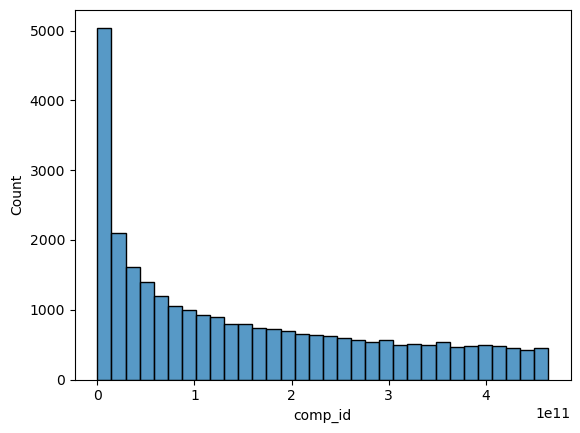

In [53]:
sns.histplot(data=df_bisnode_2012, x="comp_id")

Nenhum insight

## begin

In [54]:
df_bisnode_2012['begin'].describe()

count          28466
unique           310
top       2012-01-01
freq           25712
Name: begin, dtype: object

In [55]:
pd.DataFrame(df_bisnode_2012['begin'].value_counts()).sort_index()

,begin
2012-01-01,25712
2012-01-02,23
2012-01-03,8
2012-01-04,11
2012-01-05,5
...,...
2012-12-22,1
2012-12-27,3
2012-12-28,4
2012-12-30,1


In [56]:
df_bisnode_2012[df_bisnode_2012['begin'] == '2012-12-21']

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,preditora
56217,17568813056.000,2012-12-21,2012-12-31,NaN,358122.219,303103.719,NaN,NaN,NaN,0.000,NaN,0.000,0.000,358122.219,NaN,NaN,0.000,NaN,55018.520,37037.035,0.000,1,10,1,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5510.000,55.000,3.000,1,Central,2012-12-21,NaN,NaN,0
60598,20365844480.000,2012-12-21,2012-12-31,NaN,1851.852,0.000,NaN,NaN,NaN,0.000,NaN,0.000,0.000,1851.852,NaN,NaN,0.000,NaN,1851.852,1851.852,0.000,0,10,1,2012,2012.000,2015.000,1.000,0.000,1.000,1976.000,647.000,female,Domestic,5610.000,56.000,3.000,2,West,2012-12-12,2015-11-30,NaN,1
78450,34126663680.000,2012-12-21,2012-12-31,759.259,970.370,0.000,0.000,0.000,0.000,0.000,-881.482,0.000,37.037,685.185,122.222,0.000,-881.482,0.000,970.370,1851.852,0.000,0,10,1,2012,2012.000,NaN,1.000,0.000,0.000,1977.000,1471.000,male,Domestic,5610.000,56.000,3.000,3,Central,2012-12-18,NaN,NaN,0
90043,44973629440.000,2012-12-21,2012-12-31,NaN,1851.852,0.000,NaN,NaN,NaN,0.000,NaN,0.000,0.000,0.000,NaN,NaN,0.000,NaN,1851.852,1851.852,0.000,0,10,1,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5610.000,56.000,3.000,2,Central,2012-12-18,NaN,NaN,0
142883,113638383616.000,2012-12-21,2012-12-31,0.000,1807.407,0.000,0.000,0.000,0.000,0.000,-44.444,0.000,0.000,1792.593,44.444,0.000,-44.444,0.000,1807.407,1851.852,0.000,0,10,1,2012,2012.000,NaN,1.000,0.000,0.000,1977.000,1473.000,male,Domestic,5630.000,56.000,3.000,3,Central,2012-12-17,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182660,185649283072.000,2012-12-21,2012-12-31,NaN,1851.852,0.000,NaN,NaN,NaN,0.000,NaN,0.000,0.000,1851.852,NaN,NaN,0.000,NaN,1851.852,1851.852,0.000,0,10,1,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5610.000,56.000,3.000,3,East,2012-12-01,NaN,NaN,0
183463,187196604416.000,2012-12-21,2012-12-31,NaN,10940.741,0.000,NaN,NaN,NaN,0.000,NaN,0.000,0.000,10911.111,NaN,NaN,0.000,NaN,10940.741,11111.111,0.000,0,10,1,2012,2004.000,NaN,2.000,0.500,0.000,1942.000,1828.000,male,mix,5610.000,56.000,3.000,2,Central,2004-02-15,NaN,NaN,0
200824,224576192512.000,2012-12-21,2012-12-31,0.000,1707.407,81.481,0.000,0.000,0.000,0.000,-225.926,0.000,0.000,1666.667,144.444,44.444,-225.926,0.000,1625.926,1851.852,0.000,0,10,1,2012,2012.000,NaN,1.000,0.000,0.000,1991.000,1465.000,male,Domestic,5630.000,56.000,3.000,2,East,2012-12-21,NaN,NaN,0
218855,266418946048.000,2012-12-21,2012-12-31,NaN,0.000,0.000,NaN,NaN,NaN,0.000,NaN,0.000,0.000,0.000,NaN,NaN,0.000,NaN,0.000,1851.852,0.000,0,10,1,2012,2012.000,NaN,1.000,0.000,0.000,1977.000,419.000,male,Domestic,5610.000,56.000,3.000,1,Central,2012-12-13,NaN,NaN,0


As empresas que possuem "begin" != 2012-01-01 foram fundadas em 2012. Já temos uma coluna chamada "founded_date", portanto acredito que a "begin" não terá utilidade

In [57]:
df_bisnode_2012 = df_bisnode_2012.drop('begin', axis=1)
df_bisnode_2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28466 entries, 7 to 287825
Data columns (total 42 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   comp_id               28466 non-null  float64
 1   end                   28466 non-null  object 
 2   amort                 27375 non-null  float64
 3   curr_assets           28446 non-null  float64
 4   curr_liab             28446 non-null  float64
 5   extra_exp             27444 non-null  float64
 6   extra_inc             27444 non-null  float64
 7   extra_profit_loss     27444 non-null  float64
 8   fixed_assets          28446 non-null  float64
 9   inc_bef_tax           27444 non-null  float64
 10  intang_assets         28446 non-null  float64
 11  inventories           28446 non-null  float64
 12  liq_assets            28446 non-null  float64
 13  material_exp          27375 non-null  float64
 14  personnel_exp         27375 non-null  float64
 15  profit_loss_year  

## end

In [58]:
df_bisnode_2012['end'].describe()

count          28466
unique           187
top       2012-12-31
freq           28074
Name: end, dtype: object

In [59]:
pd.DataFrame(df_bisnode_2012['end'].value_counts(normalize=True)).sort_index()

,end
2012-01-02,0.000
2012-01-03,0.000
2012-01-04,0.000
2012-01-09,0.000
2012-01-11,0.000
...,...
2012-12-16,0.000
2012-12-18,0.000
2012-12-20,0.000
2012-12-28,0.000


In [60]:
df_bisnode_2012[df_bisnode_2012['end'] == '2012-05-31']

,comp_id,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,preditora
22693,2886786560.000,2012-05-31,0.000,207.407,0.000,0.000,0.000,0.000,0.000,-70.370,0.000,0.000,207.407,70.370,0.000,0.000,0.000,207.407,2592.593,0.000,0,151,1,2012,2002.000,NaN,1.000,0.000,1.000,1974.000,3330.000,female,Domestic,5610.000,56.000,3.000,1,Central,2002-10-31,NaN,NaN,0
54936,16781853696.000,2012-05-31,0.000,1874.074,0.000,0.000,0.000,0.000,0.000,-162.963,0.000,0.000,1848.148,162.963,0.000,-162.963,0.000,1874.074,2037.037,0.000,0,91,1,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3312.000,33.000,2.000,2,East,1994-12-31,2012-09-03,NaN,1
100055,55253114880.000,2012-05-31,0.000,11688.889,0.000,0.000,0.000,0.000,0.000,-66.667,0.000,0.000,11688.889,66.667,0.000,-66.667,0.000,11688.889,11111.111,0.000,0,50,1,2012,2001.000,2012.000,1.000,0.000,0.000,1964.000,3719.000,male,Domestic,3320.000,33.000,2.000,3,East,2001-12-12,2012-08-22,NaN,1
105877,61783343104.000,2012-05-31,0.000,525.926,0.000,0.000,0.000,0.000,0.000,-370.370,0.000,0.000,470.370,55.556,303.704,-370.370,0.000,525.926,33.333,0.000,0,60,1,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5629.000,56.000,3.000,1,Central,1999-12-17,2012-08-16,0.250,1
119507,79369453568.000,2012-05-31,440.741,2988.889,11833.333,0.000,0.000,0.000,1666.667,-9018.519,0.000,1222.222,25.926,12422.223,3322.222,-9029.630,7166.667,-7177.778,1851.852,1666.667,0,151,1,2012,2011.000,NaN,1.000,0.000,0.000,1949.000,2049.000,male,Domestic,5610.000,56.000,3.000,1,Central,2011-05-23,NaN,0.083,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163412,148810891264.000,2012-05-31,0.000,566.667,3100.000,0.000,0.000,0.000,0.000,-14574.074,0.000,377.778,188.889,8444.444,3788.889,-14574.074,9362.963,-2533.333,11111.111,0.000,0,151,1,2012,1997.000,2015.000,1.000,1.000,0.000,NaN,1137.000,male,Foreign,5610.000,56.000,3.000,1,Central,1997-03-23,2015-04-01,0.345,1
175277,170817650688.000,2012-05-31,0.000,88.889,685.185,0.000,0.000,0.000,0.000,-74.074,0.000,0.000,11.111,74.074,0.000,-74.074,0.000,-596.296,2962.963,0.000,0,71,1,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5610.000,56.000,3.000,3,East,2005-12-01,2013-05-23,NaN,1
227393,288604979200.000,2012-05-31,0.000,48.148,0.000,0.000,0.000,0.000,0.000,-81.481,0.000,0.000,11.111,96.296,0.000,-81.481,0.000,48.148,2592.593,0.000,0,120,1,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5630.000,56.000,3.000,2,East,2007-10-07,2013-03-27,0.083,1
230538,296570421248.000,2012-05-31,NaN,185.185,0.000,NaN,NaN,NaN,0.000,NaN,0.000,0.000,7.407,NaN,NaN,0.000,NaN,185.185,10185.186,0.000,0,151,1,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5630.000,56.000,3.000,3,West,2004-11-12,2013-01-02,NaN,1


In [61]:
df_bisnode[df_bisnode['comp_id'] == 415044632576.000]

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,preditora
272471,415044632576.000,2008-01-01,2008-12-31,0.000,11281.481,1688.889,0.000,0.000,0.000,0.000,-1518.519,0.000,0.000,11111.111,851.852,0.000,-1518.519,0.000,9592.593,11111.111,0.000,0,365,0,2008,2007.000,2015.000,1.000,1.000,0.000,NaN,798.000,male,Foreign,5510.000,55.000,3.000,1,Central,2007-06-29,2015-06-23,NaN,1
272472,415044632576.000,2012-01-01,2012-05-31,0.000,6722.222,637.037,0.000,0.000,0.000,0.000,-7.407,0.000,0.000,6718.519,11.111,0.000,-7.407,0.000,6085.185,11111.111,0.000,0,151,1,2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5510.000,55.000,3.000,1,Central,2007-06-29,2015-06-23,NaN,1


Os dados que possuem "end" != 2012-12-31 estão estranhos. Como são menos de 2%, iremos remover.

In [62]:
indexEnd = df_bisnode_2012[df_bisnode_2012['end'] != '2012-12-31'].index
df_bisnode_2012.drop(indexEnd , inplace=True)
df_bisnode_2012[df_bisnode_2012['end'] != '2012-12-31']

,comp_id,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,preditora


Como a coluna agora possui só valores iguais, podemos remover

In [63]:
df_bisnode_2012 = df_bisnode_2012.drop('end', axis=1)
df_bisnode_2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28074 entries, 7 to 287825
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   comp_id               28074 non-null  float64
 1   amort                 27025 non-null  float64
 2   curr_assets           28063 non-null  float64
 3   curr_liab             28063 non-null  float64
 4   extra_exp             27092 non-null  float64
 5   extra_inc             27092 non-null  float64
 6   extra_profit_loss     27092 non-null  float64
 7   fixed_assets          28063 non-null  float64
 8   inc_bef_tax           27092 non-null  float64
 9   intang_assets         28063 non-null  float64
 10  inventories           28063 non-null  float64
 11  liq_assets            28063 non-null  float64
 12  material_exp          27025 non-null  float64
 13  personnel_exp         27025 non-null  float64
 14  profit_loss_year      28063 non-null  float64
 15  sales             

## amort

In [64]:
#df_bisnode_2012['amort'].describe()

In [65]:
#amort_nan = df_bisnode_2012['amort'][~np.isnan(df_bisnode_2012['amort'])]
#amort_nan.head()

In [66]:
#plt.ticklabel_format(style='plain', axis='y')
#plt.ticklabel_format(style='plain', axis='x')
#sns.histplot(#, bins=10)

In [67]:
#np.percentile(amort_nan,90)

Acredito que a melhor solução para usar esse dado seja criar categorias:

- Nulo
- Menor que 0
- 0 a 500
- 500 a 3000
- Maior que 3000

In [68]:
#def amort_bucket(amort_column):
#    if pd.isnull(amort_column):
#        return 'Nulo'
#    elif amort_column < 0:
#        return 'Menor que 0'
#    elif ((amort_column >= 0) and (amort_column < 500)):
#        return '0 a 500'
#    elif ((amort_column >= 500) and (amort_column < 3000)):
#        return '500 a 3000'
#    elif amort_column >= 3000:
#        return 'Maior que 3000'    
#    return 'Erro'

In [69]:
#df_bisnode_2012['amort_bucket'] = df_bisnode_2012['amort'].apply(lambda x: amort_bucket(x))

In [70]:
#df_bisnode_2012['amort_bucket'].value_counts()

Agora podemos remover a coluna "amort"

In [71]:
#df_bisnode_2012 = df_bisnode_2012.drop('amort', axis=1)
#df_bisnode_2012.info()

## curr_assets

In [72]:
#df_bisnode_2012['curr_assets'].describe()

In [73]:
#curr_assets_nan = df_bisnode_2012['curr_assets'][~np.isnan(df_bisnode_2012['curr_assets'])]
#np.percentile(curr_assets_nan,99)

Estou percebendo que será um problema lidar com nulos com várias colunas. Acredito que seja melhor remover. Vamos fazer um teste:

In [74]:
df_bisnode_2012 = df_bisnode_2012.drop(['exit_year','birth_year','exit_date','labor_avg'], axis=1)
df_bisnode_2012.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28074 entries, 7 to 287825
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   comp_id               28074 non-null  float64
 1   amort                 27025 non-null  float64
 2   curr_assets           28063 non-null  float64
 3   curr_liab             28063 non-null  float64
 4   extra_exp             27092 non-null  float64
 5   extra_inc             27092 non-null  float64
 6   extra_profit_loss     27092 non-null  float64
 7   fixed_assets          28063 non-null  float64
 8   inc_bef_tax           27092 non-null  float64
 9   intang_assets         28063 non-null  float64
 10  inventories           28063 non-null  float64
 11  liq_assets            28063 non-null  float64
 12  material_exp          27025 non-null  float64
 13  personnel_exp         27025 non-null  float64
 14  profit_loss_year      28063 non-null  float64
 15  sales             

In [75]:
newdf = df_bisnode_2012.dropna()

In [76]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23346 entries, 7 to 287825
Data columns (total 37 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   comp_id               23346 non-null  float64
 1   amort                 23346 non-null  float64
 2   curr_assets           23346 non-null  float64
 3   curr_liab             23346 non-null  float64
 4   extra_exp             23346 non-null  float64
 5   extra_inc             23346 non-null  float64
 6   extra_profit_loss     23346 non-null  float64
 7   fixed_assets          23346 non-null  float64
 8   inc_bef_tax           23346 non-null  float64
 9   intang_assets         23346 non-null  float64
 10  inventories           23346 non-null  float64
 11  liq_assets            23346 non-null  float64
 12  material_exp          23346 non-null  float64
 13  personnel_exp         23346 non-null  float64
 14  profit_loss_year      23346 non-null  float64
 15  sales             

Vamos começar de novo!

## amort

In [77]:
def plot_without_outliers(column, bins=10):
    max = np.percentile(newdf[column], 95)
    min = np.percentile(newdf[column], 5)
    x = newdf[(newdf[column] < max) & (newdf[column] >= min)][column]

    plt.ticklabel_format(style='plain', axis='y')
    plt.ticklabel_format(style='plain', axis='x')
    
    sns.histplot(data=newdf, x=x, bins=bins, hue='preditora', multiple='dodge', kde=True)
    #sns.displot(data=newdf, x=x, col='preditora', bins=10, stat='percent')

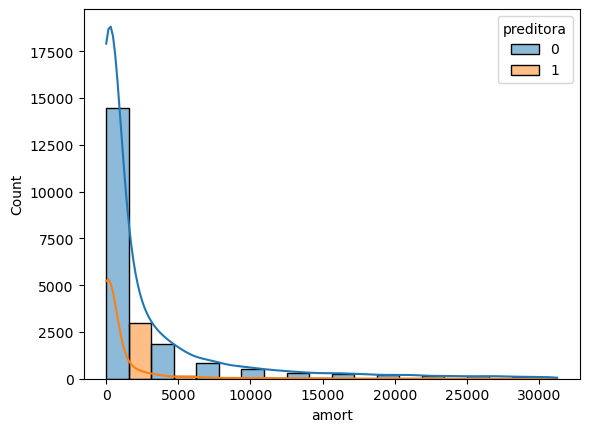

In [78]:
plot_without_outliers('amort')

## curr_assets

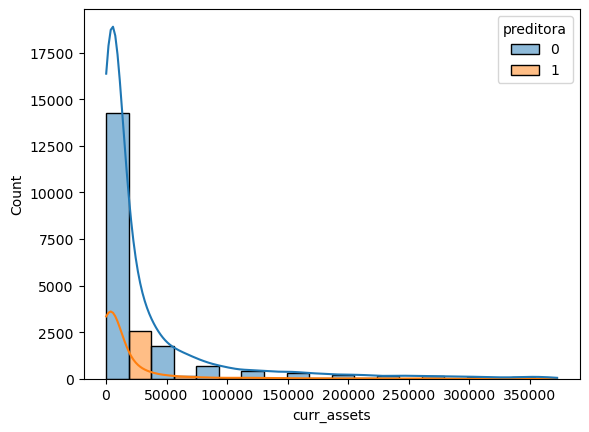

In [79]:
plot_without_outliers('curr_assets')

## curr_liab             

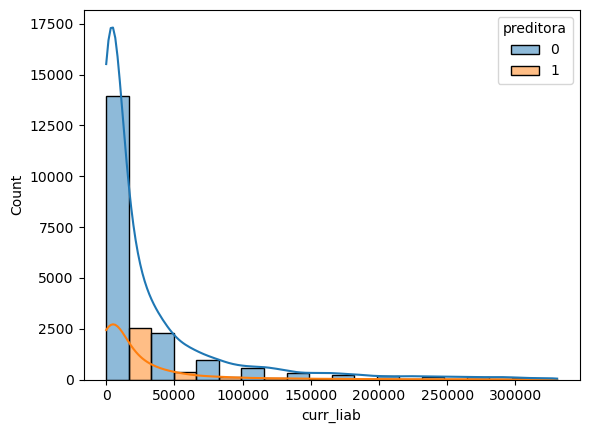

In [80]:
plot_without_outliers('curr_liab')

## extra_exp

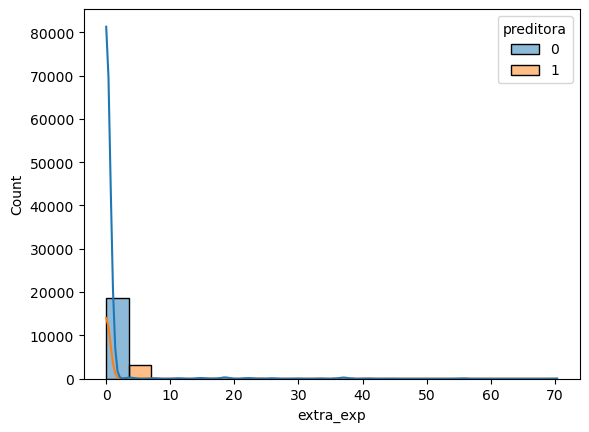

In [81]:
plot_without_outliers('extra_exp')

## extra_inc

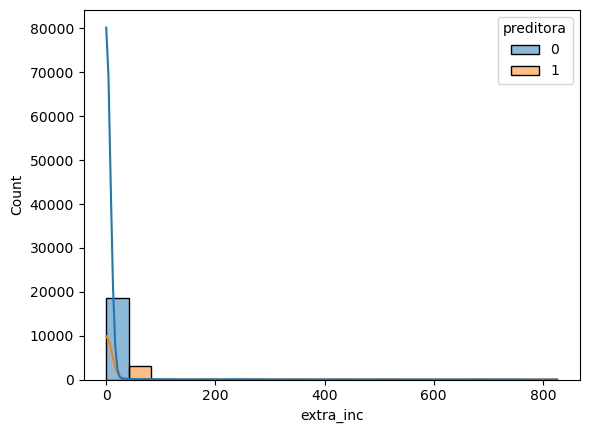

In [82]:
plot_without_outliers('extra_inc')

## extra_profit_loss

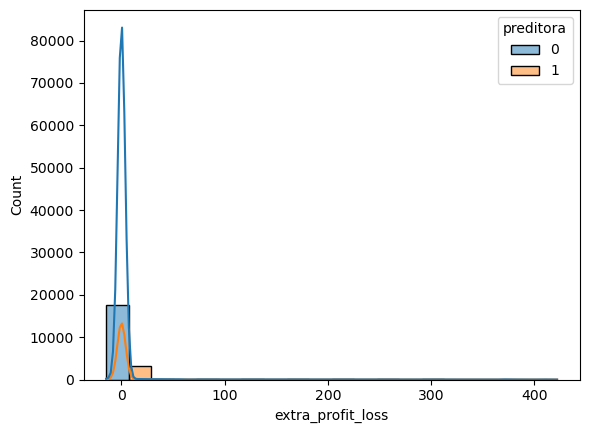

In [83]:
plot_without_outliers('extra_profit_loss')

## fixed_assets

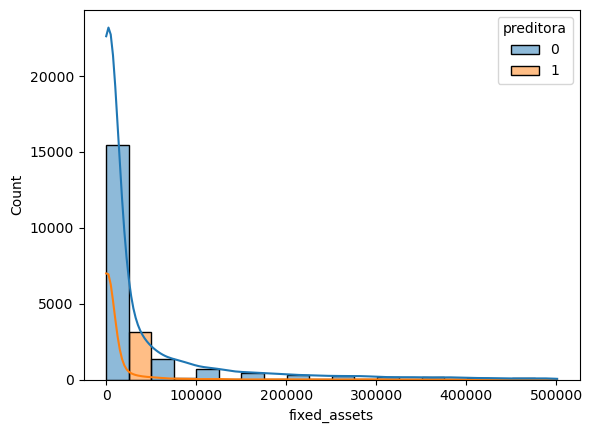

In [84]:
plot_without_outliers('fixed_assets')

## inc_bef_tax

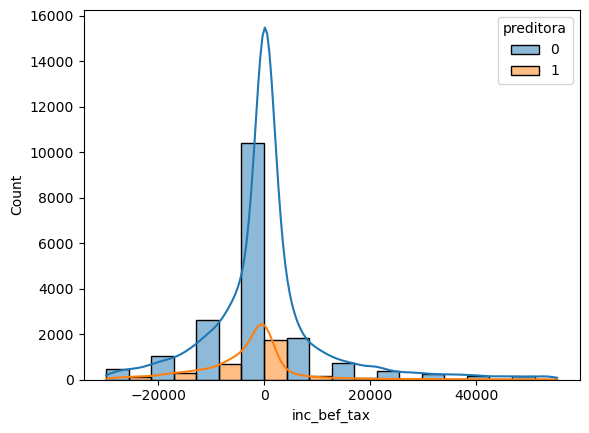

In [85]:
plot_without_outliers('inc_bef_tax')

## intang_assets

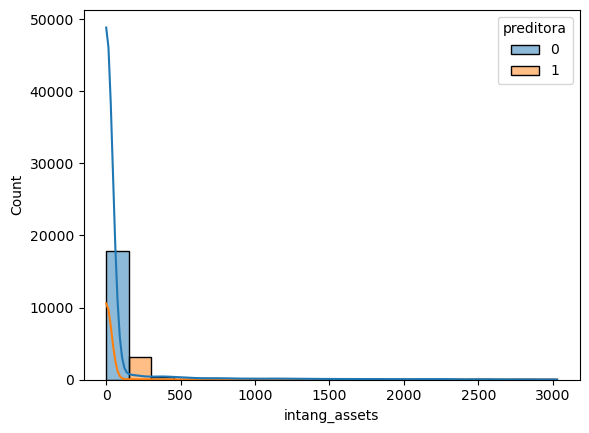

In [86]:
plot_without_outliers('intang_assets')

## inventories

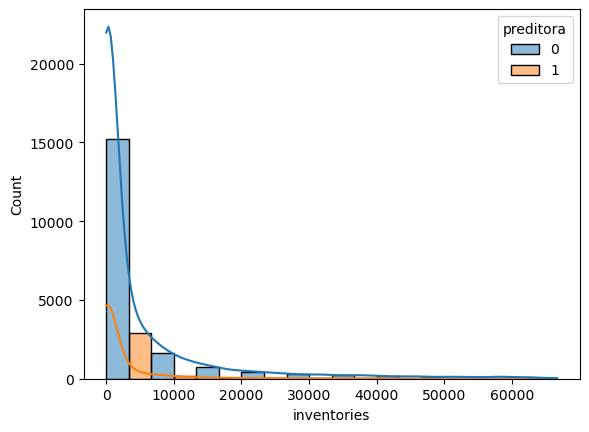

In [87]:
plot_without_outliers('inventories')

## liq_assets

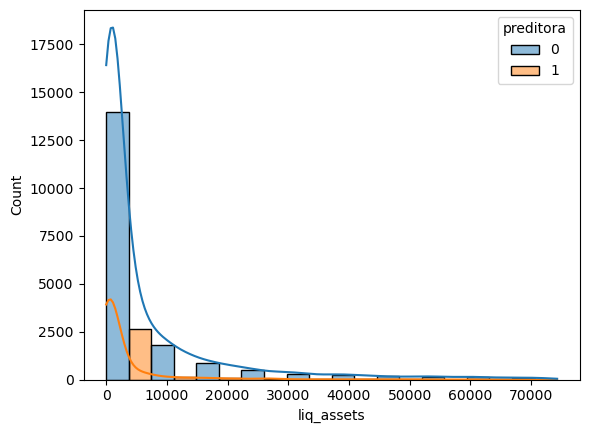

In [88]:
plot_without_outliers('liq_assets')

## material_exp

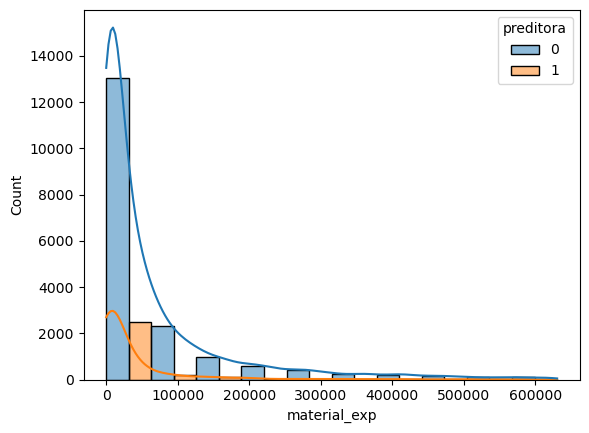

In [89]:
plot_without_outliers('material_exp')

## personnel_exp

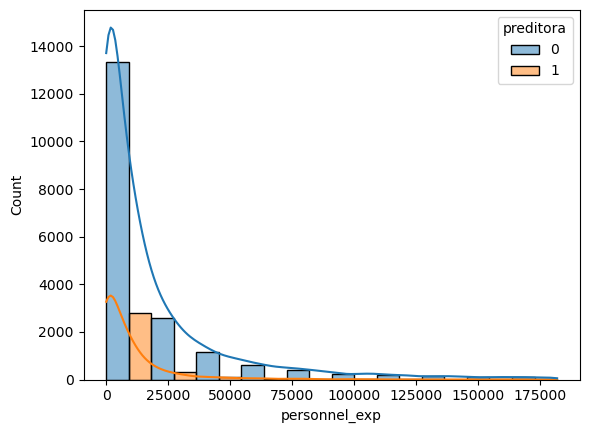

In [90]:
plot_without_outliers('personnel_exp')

## profit_loss_year

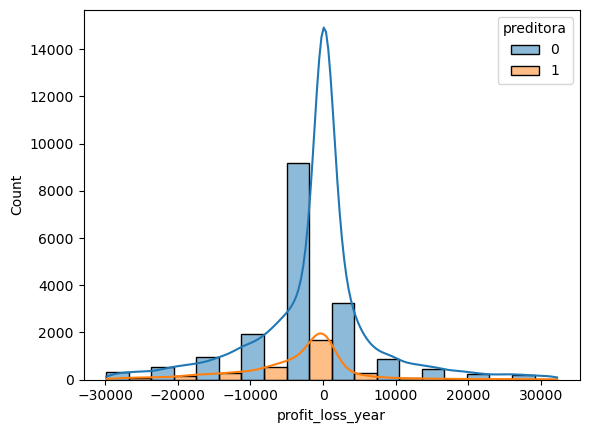

In [91]:
plot_without_outliers('profit_loss_year')

## sales

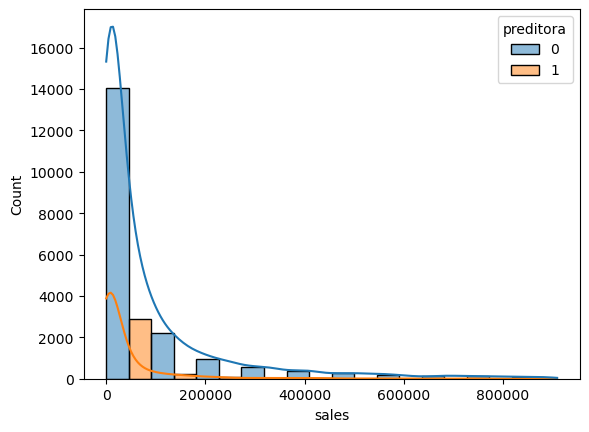

In [92]:
plot_without_outliers('sales')

## share_eq

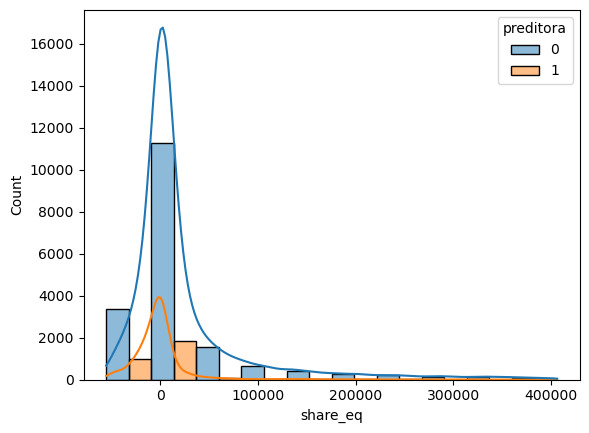

In [93]:
plot_without_outliers('share_eq')

## subscribed_cap

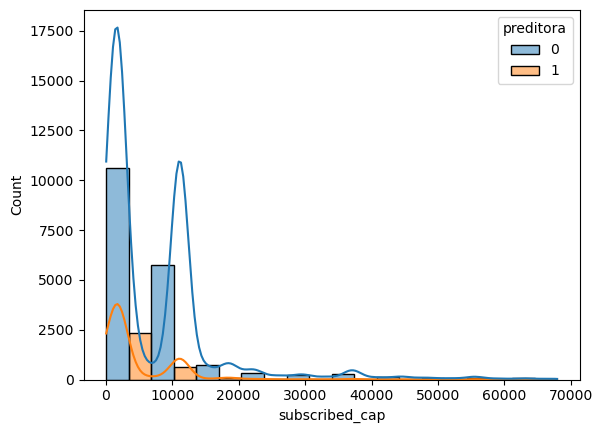

In [94]:
plot_without_outliers('subscribed_cap')

## tang_assets

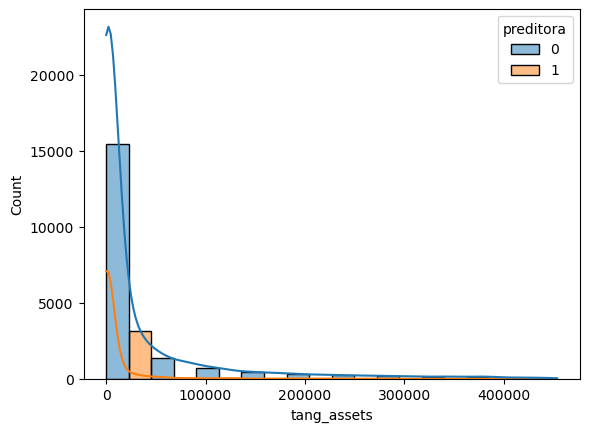

In [95]:
plot_without_outliers('tang_assets')

## balsheet_flag

In [96]:
newdf['balsheet_flag'].value_counts()

0    23237
1      109
Name: balsheet_flag, dtype: int64

<Axes: xlabel='preditora'>

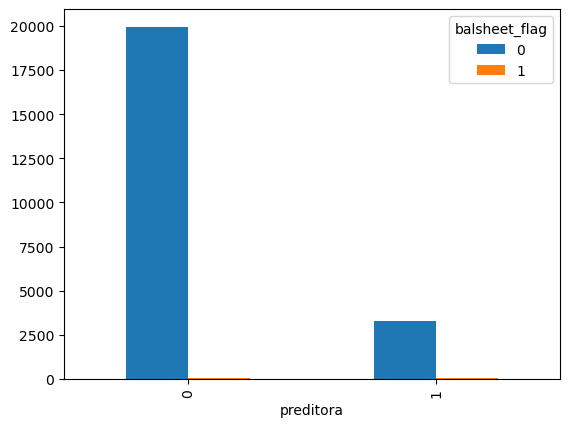

In [97]:
newdf.groupby('preditora')['balsheet_flag'].value_counts().unstack(level=1).plot(kind='bar')

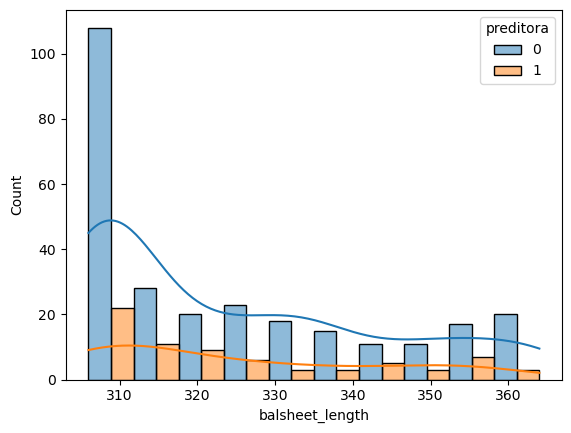

In [98]:
plot_without_outliers('balsheet_length')

## balsheet_notfullyear

In [99]:
newdf['balsheet_notfullyear'].value_counts()

0    21886
1     1460
Name: balsheet_notfullyear, dtype: int64

<Axes: xlabel='preditora'>

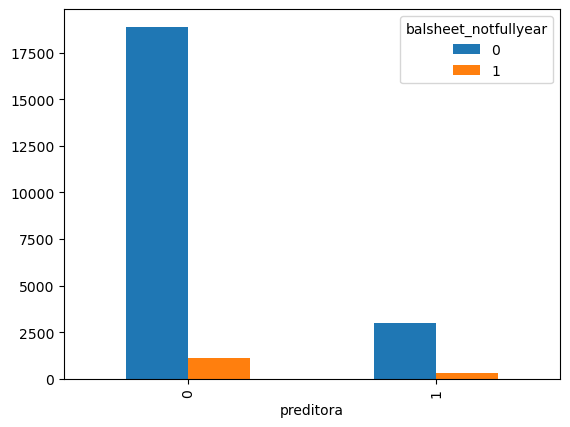

In [100]:
newdf.groupby('preditora')['balsheet_notfullyear'].value_counts().unstack(level=1).plot(kind='bar')

## year

In [101]:
newdf['year'].value_counts()

2012    23346
Name: year, dtype: int64

Podemos remover essa variável

In [102]:
newdf = newdf.drop('year', axis=1)
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23346 entries, 7 to 287825
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   comp_id               23346 non-null  float64
 1   amort                 23346 non-null  float64
 2   curr_assets           23346 non-null  float64
 3   curr_liab             23346 non-null  float64
 4   extra_exp             23346 non-null  float64
 5   extra_inc             23346 non-null  float64
 6   extra_profit_loss     23346 non-null  float64
 7   fixed_assets          23346 non-null  float64
 8   inc_bef_tax           23346 non-null  float64
 9   intang_assets         23346 non-null  float64
 10  inventories           23346 non-null  float64
 11  liq_assets            23346 non-null  float64
 12  material_exp          23346 non-null  float64
 13  personnel_exp         23346 non-null  float64
 14  profit_loss_year      23346 non-null  float64
 15  sales             

## founded_year

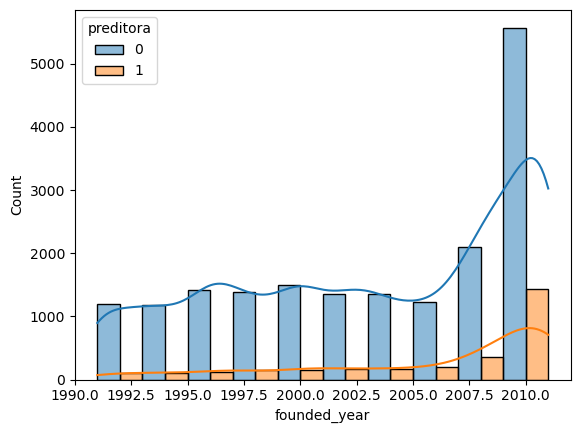

In [103]:
plot_without_outliers('founded_year')

# ceo_count

<Axes: xlabel='preditora'>

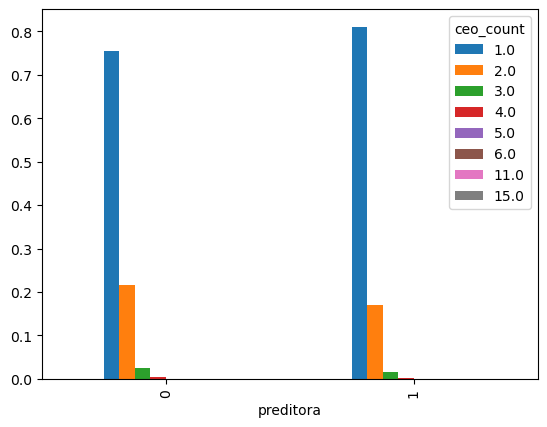

In [104]:
newdf.groupby('preditora')['ceo_count'].value_counts(normalize=True).unstack(level=1).plot(kind='bar')

## foreign

In [105]:
newdf['foreign'].value_counts()

0.000    20463
1.000     2192
0.500      549
0.333       78
0.667       37
         ...  
0.750        7
0.800        2
0.400        2
0.167        1
0.200        1
Name: foreign, Length: 11, dtype: int64

<Axes: xlabel='preditora'>

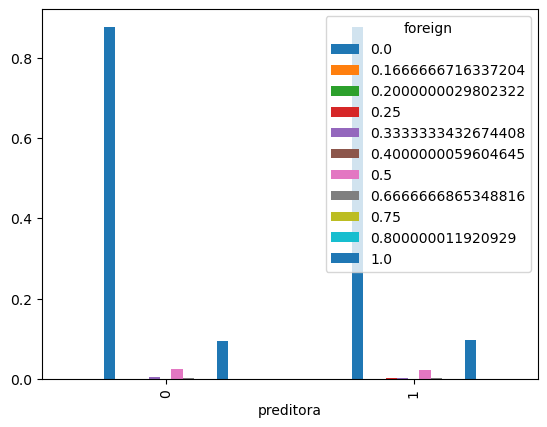

In [106]:
newdf.groupby('preditora')['foreign'].value_counts(normalize=True).unstack(level=1).plot(kind='bar')

## female

In [107]:
newdf['female'].value_counts()

0.000    15930
1.000     4858
0.500     2281
0.333      181
0.667       72
0.250       15
0.750        3
0.200        3
0.400        2
0.167        1
Name: female, dtype: int64

<Axes: xlabel='preditora'>

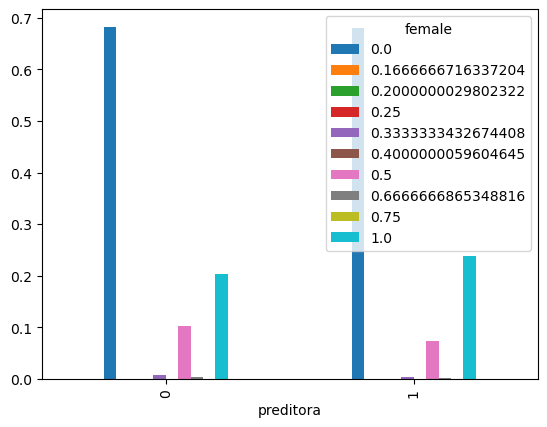

In [108]:
newdf.groupby('preditora')['female'].value_counts(normalize=True).unstack(level=1).plot(kind='bar')

## inoffice_days

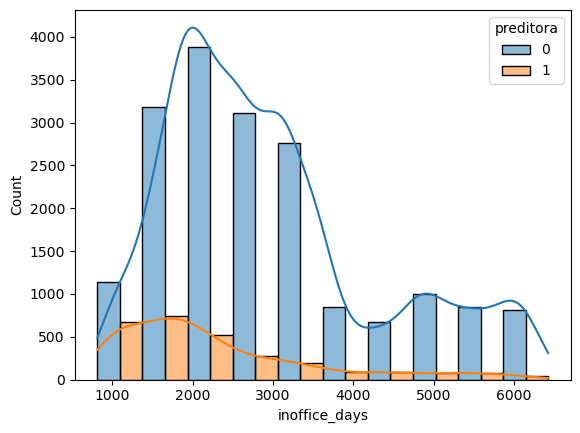

In [109]:
plot_without_outliers('inoffice_days')

## gender

<Axes: xlabel='preditora'>

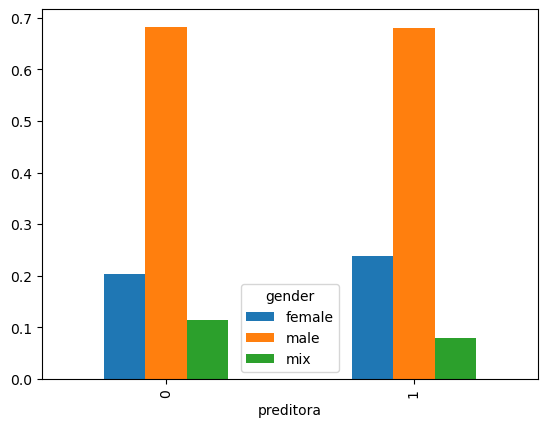

In [110]:
newdf.groupby('preditora')['gender'].value_counts(normalize=True).unstack(level=1).plot(kind='bar')

# origin

In [111]:
newdf['origin'].value_counts()

Domestic    20463
Foreign      2192
mix           691
Name: origin, dtype: int64

<Axes: xlabel='preditora'>

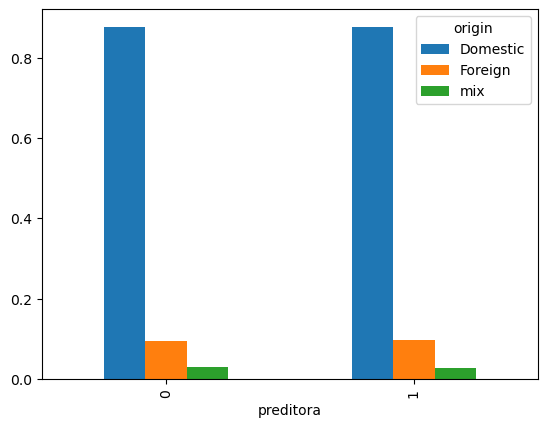

In [112]:
newdf.groupby('preditora')['origin'].value_counts(normalize=True).unstack(level=1).plot(kind='bar')

## nace_main

In [113]:
newdf['nace_main'].value_counts()

5610.000    9415
5630.000    3525
5510.000    1544
3312.000     958
5629.000     919
            ... 
2840.000       4
2680.000       2
2731.000       1
5500.000       1
3040.000       1
Name: nace_main, Length: 72, dtype: int64

Não traz muita informação. Podemos remover.

In [114]:
newdf = newdf.drop('nace_main', axis=1)
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23346 entries, 7 to 287825
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   comp_id               23346 non-null  float64
 1   amort                 23346 non-null  float64
 2   curr_assets           23346 non-null  float64
 3   curr_liab             23346 non-null  float64
 4   extra_exp             23346 non-null  float64
 5   extra_inc             23346 non-null  float64
 6   extra_profit_loss     23346 non-null  float64
 7   fixed_assets          23346 non-null  float64
 8   inc_bef_tax           23346 non-null  float64
 9   intang_assets         23346 non-null  float64
 10  inventories           23346 non-null  float64
 11  liq_assets            23346 non-null  float64
 12  material_exp          23346 non-null  float64
 13  personnel_exp         23346 non-null  float64
 14  profit_loss_year      23346 non-null  float64
 15  sales             

## ind2

In [115]:
newdf['ind2'].value_counts()

56.000    13973
55.000     2884
28.000     2076
33.000     1945
26.000     1191
27.000      730
29.000      351
30.000      196
Name: ind2, dtype: int64

<Axes: xlabel='preditora'>

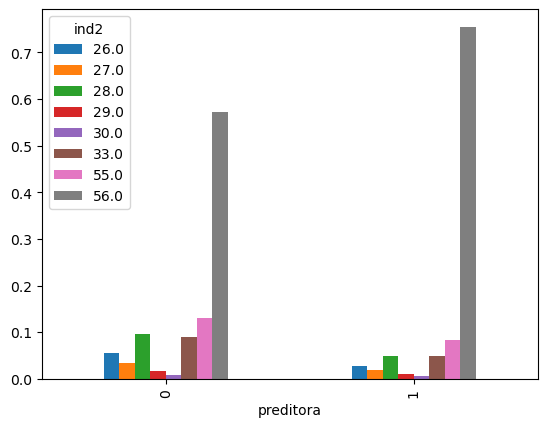

In [116]:
newdf.groupby('preditora')['ind2'].value_counts(normalize=True).unstack(level=1).plot(kind='bar')

## ind

In [117]:
newdf['ind'].value_counts()

3.000    16857
2.000     5942
1.000      547
Name: ind, dtype: int64

<Axes: xlabel='preditora'>

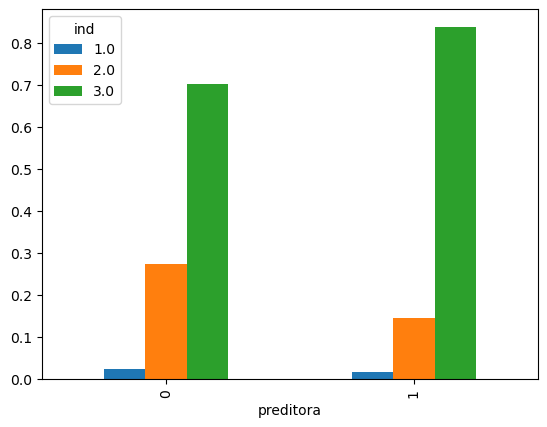

In [118]:
newdf.groupby('preditora')['ind'].value_counts(normalize=True).unstack(level=1).plot(kind='bar')

## urban_m

In [119]:
newdf['urban_m'].value_counts()

3    9453
1    7440
2    6453
Name: urban_m, dtype: int64

<Axes: xlabel='preditora'>

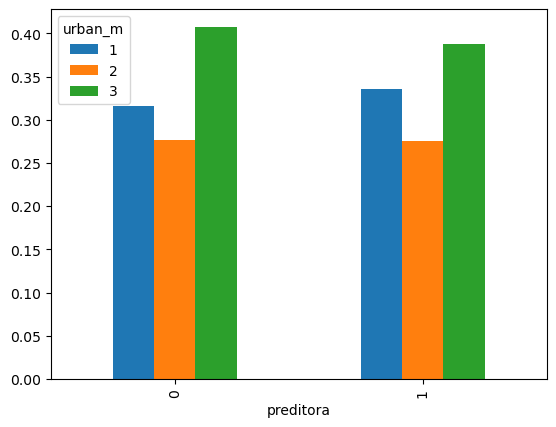

In [120]:
newdf.groupby('preditora')['urban_m'].value_counts(normalize=True).unstack(level=1).plot(kind='bar')

## region_m

In [121]:
newdf['region_m'].value_counts()

Central    13915
East        5858
West        3573
Name: region_m, dtype: int64

<Axes: xlabel='preditora'>

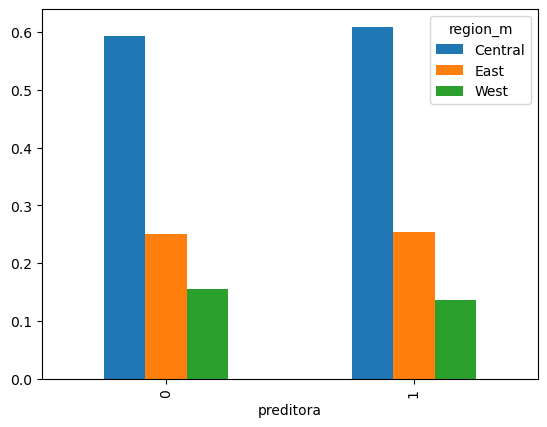

In [122]:
newdf.groupby('preditora')['region_m'].value_counts(normalize=True).unstack(level=1).plot(kind='bar')

## founded_date

In [123]:
newdf['founded_date'].value_counts()

2011-12-21    70
2011-12-20    47
2011-12-27    43
2009-05-27    42
2012-02-26    41
              ..
1991-09-15     1
1990-08-11     1
1995-09-26     1
1995-10-23     1
1989-04-28     1
Name: founded_date, Length: 5064, dtype: int64

Vamos calcular a idade da empresa em dias

In [124]:
newdf['aux_date'] = '2012-01-01'

In [125]:
newdf[['founded_date','aux_date']] = newdf[['founded_date','aux_date']].apply(pd.to_datetime)

In [126]:
newdf['days_since_founded'] = (newdf['aux_date'] - newdf['founded_date']) / np.timedelta64(1, 'D')

In [127]:
newdf['days_since_founded']

7        7713.000
14       1407.000
23       2008.000
35       2994.000
48        493.000
           ...   
287779   6076.000
287790   2063.000
287798   1179.000
287814   8283.000
287825   7802.000
Name: days_since_founded, Length: 23346, dtype: float64

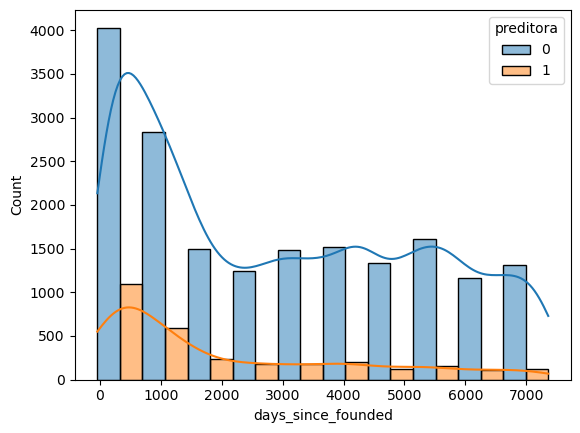

In [128]:
plot_without_outliers('days_since_founded')

Podemos remover "founded_date", "founded_year" e "aux_date"

In [129]:
newdf = newdf.drop(['founded_date','aux_date','founded_year'], axis=1)
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23346 entries, 7 to 287825
Data columns (total 34 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   comp_id               23346 non-null  float64
 1   amort                 23346 non-null  float64
 2   curr_assets           23346 non-null  float64
 3   curr_liab             23346 non-null  float64
 4   extra_exp             23346 non-null  float64
 5   extra_inc             23346 non-null  float64
 6   extra_profit_loss     23346 non-null  float64
 7   fixed_assets          23346 non-null  float64
 8   inc_bef_tax           23346 non-null  float64
 9   intang_assets         23346 non-null  float64
 10  inventories           23346 non-null  float64
 11  liq_assets            23346 non-null  float64
 12  material_exp          23346 non-null  float64
 13  personnel_exp         23346 non-null  float64
 14  profit_loss_year      23346 non-null  float64
 15  sales             

## endividamento

In [130]:
newdf.head()

,comp_id,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,ceo_count,foreign,female,inoffice_days,gender,origin,ind2,ind,urban_m,region_m,preditora,days_since_founded
7,1001034.000,140.741,148.148,21429.629,0.000,0.000,0.000,340.741,-2474.074,0.000,0.000,25.926,1862.963,285.185,-2474.074,0.000,-20940.740,1481.481,340.741,0,365,0,2.000,0.000,0.500,4895.500,mix,Domestic,56.000,3.000,1,Central,0,7713.000
14,1001541.000,481.481,9629.630,1303.704,0.000,0.000,0.000,190566.672,-7696.296,0.000,0.000,9048.148,8351.852,0.000,-7722.222,1203.704,191262.969,200740.734,190566.672,0,365,0,1.000,0.000,0.000,3222.000,male,Domestic,56.000,3.000,3,Central,0,1407.000
23,1002029.000,14929.630,203885.188,120444.453,0.000,0.000,0.000,23459.260,11818.519,0.000,677.778,15077.777,984270.375,41037.035,9722.223,1136514.875,93144.445,11111.111,23459.260,0,365,0,2.000,0.000,0.000,3101.000,male,Domestic,27.000,2.000,3,East,0,2008.000
35,1003200.000,25.926,22.222,10996.296,0.000,0.000,0.000,0.000,-2337.037,0.000,0.000,22.222,1933.333,1355.556,-2340.741,2785.185,-23785.186,1851.852,0.000,0,365,0,2.000,0.000,1.000,1754.000,female,Domestic,56.000,3.000,1,Central,1,2994.000
48,1007261.000,0.000,255.556,9207.407,0.000,0.000,0.000,0.000,-4670.371,0.000,0.000,255.556,0.000,4670.371,-4670.371,0.000,-8951.852,1851.852,0.000,0,365,0,1.000,0.000,0.000,1539.000,male,Domestic,56.000,3.000,1,Central,1,493.000


In [131]:
newdf['endividamento'] = (newdf['curr_liab'] / ( newdf['curr_assets'] + newdf['fixed_assets'])).replace(np.nan, 0)
newdf.head()

,comp_id,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,ceo_count,foreign,female,inoffice_days,gender,origin,ind2,ind,urban_m,region_m,preditora,days_since_founded,endividamento
7,1001034.000,140.741,148.148,21429.629,0.000,0.000,0.000,340.741,-2474.074,0.000,0.000,25.926,1862.963,285.185,-2474.074,0.000,-20940.740,1481.481,340.741,0,365,0,2.000,0.000,0.500,4895.500,mix,Domestic,56.000,3.000,1,Central,0,7713.000,43.833
14,1001541.000,481.481,9629.630,1303.704,0.000,0.000,0.000,190566.672,-7696.296,0.000,0.000,9048.148,8351.852,0.000,-7722.222,1203.704,191262.969,200740.734,190566.672,0,365,0,1.000,0.000,0.000,3222.000,male,Domestic,56.000,3.000,3,Central,0,1407.000,0.007
23,1002029.000,14929.630,203885.188,120444.453,0.000,0.000,0.000,23459.260,11818.519,0.000,677.778,15077.777,984270.375,41037.035,9722.223,1136514.875,93144.445,11111.111,23459.260,0,365,0,2.000,0.000,0.000,3101.000,male,Domestic,27.000,2.000,3,East,0,2008.000,0.530
35,1003200.000,25.926,22.222,10996.296,0.000,0.000,0.000,0.000,-2337.037,0.000,0.000,22.222,1933.333,1355.556,-2340.741,2785.185,-23785.186,1851.852,0.000,0,365,0,2.000,0.000,1.000,1754.000,female,Domestic,56.000,3.000,1,Central,1,2994.000,494.833
48,1007261.000,0.000,255.556,9207.407,0.000,0.000,0.000,0.000,-4670.371,0.000,0.000,255.556,0.000,4670.371,-4670.371,0.000,-8951.852,1851.852,0.000,0,365,0,1.000,0.000,0.000,1539.000,male,Domestic,56.000,3.000,1,Central,1,493.000,36.029


## debt_equity

In [132]:
newdf['debt_equity'] = newdf['curr_liab'] / ( newdf['share_eq'] + newdf['subscribed_cap'])

/tmp/ipykernel_937/2649874172.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  heatmap = sns.heatmap(newdf.corr(), vmin=-1, vmax=1, cmap='BrBG')


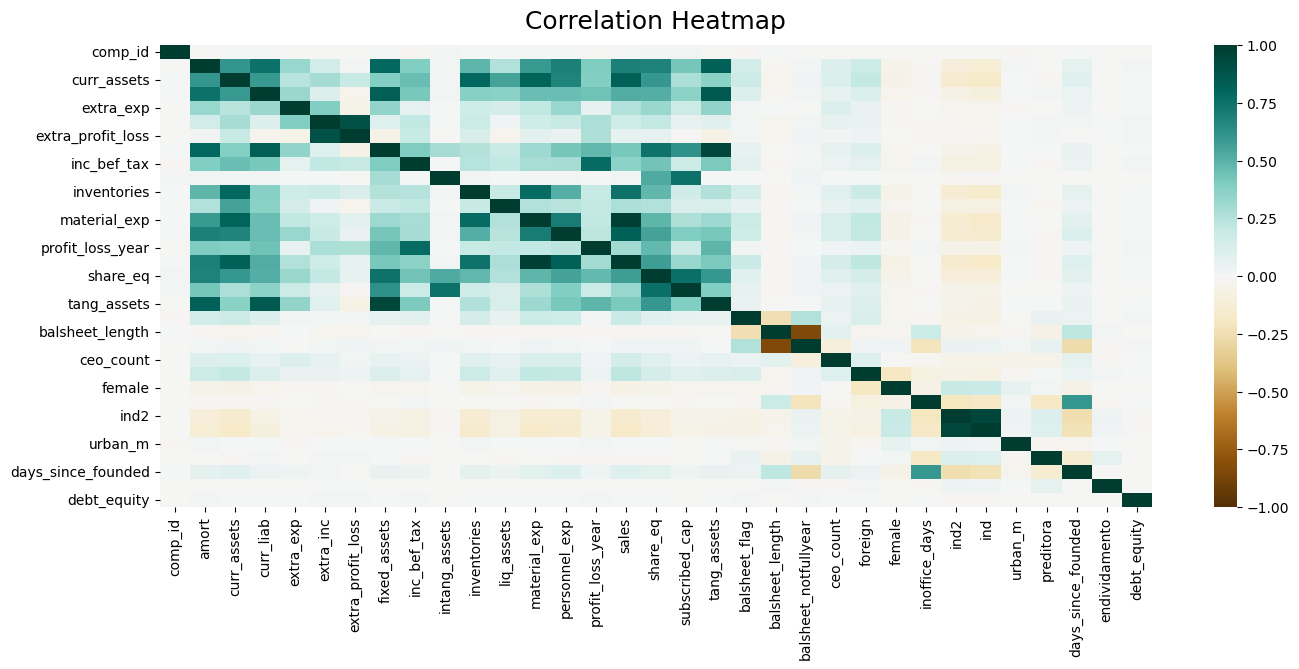

In [133]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(newdf.corr(), vmin=-1, vmax=1, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

## Adicionar dados do ano anterior

In [134]:
df_bisnode_2011 = df_bisnode[df_bisnode['year'] == 2011]
df_bisnode_2011.head()

,comp_id,begin,end,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,year,founded_year,exit_year,ceo_count,foreign,female,birth_year,inoffice_days,gender,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,preditora
6,1001034.000,2011-01-01,2011-12-31,155.556,3607.407,22555.555,0.000,0.000,0.000,481.481,-1570.370,0.000,0.000,1633.333,200.000,225.926,-1570.370,0.000,-18466.666,1481.481,481.481,0,364,0,2011,1990.000,NaN,2.000,0.000,0.500,1954.000,4895.500,mix,Domestic,5630.000,56.000,3.000,1,Central,1990-11-19,NaN,0.083,0
13,1001541.000,2011-01-01,2011-12-31,0.000,127403.703,127325.930,0.000,0.000,0.000,0.000,-818.518,0.000,0.000,837.037,818.518,0.000,-818.518,0.000,77.778,1851.852,0.000,0,364,0,2011,2008.000,NaN,1.000,0.000,0.000,1974.000,3222.000,male,Domestic,5610.000,56.000,3.000,3,Central,2008-02-24,NaN,NaN,0
22,1002029.000,2011-01-01,2011-12-31,19714.814,779396.312,755859.250,0.000,0.000,0.000,39540.742,7996.296,0.000,331529.625,46029.629,390088.875,29596.297,0.000,573222.250,83422.219,11111.111,39540.742,0,364,0,2011,2006.000,NaN,2.000,0.000,0.000,1975.000,3101.000,male,Domestic,2711.000,27.000,2.000,3,East,2006-07-03,NaN,0.341,0
34,1003200.000,2011-01-01,2011-12-31,74.074,466.667,8237.037,0.000,0.000,0.000,874.074,-44.444,0.000,296.296,70.370,9233.333,1762.963,-51.852,11577.777,-21444.445,1851.852,874.074,0,364,0,2011,2003.000,2014.000,2.000,0.000,1.000,NaN,1754.000,female,Domestic,5630.000,56.000,3.000,1,Central,2003-10-21,2014-08-09,NaN,1
42,1004012.000,2011-01-01,2011-12-31,0.000,2674.074,1192.593,0.000,0.000,0.000,0.000,1337.037,0.000,0.000,418.519,374.074,203.704,1203.704,1914.815,1481.481,74.074,0.000,0,364,0,2011,1991.000,2013.000,1.000,0.000,0.000,NaN,7722.000,male,Domestic,3314.000,33.000,2.000,3,West,1991-11-24,2013-06-19,0.083,0


In [140]:
df_join = df_bisnode_2011[['comp_id','sales','inoffice_days','share_eq']]

In [142]:
df_join.columns = ['prev_comp_id','prev_sales','prev_inoffice_days','prev_share_eq']

In [143]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28222 entries, 6 to 287824
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   prev_comp_id        28222 non-null  float64
 1   prev_sales          27064 non-null  float64
 2   prev_inoffice_days  24214 non-null  float64
 3   prev_share_eq       28217 non-null  float64
dtypes: float64(4)
memory usage: 1.1 MB


In [144]:
df_final = newdf.merge(df_join, left_on='comp_id', right_on='prev_comp_id', how='left')
df_final.head()

,comp_id,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,fixed_assets,inc_bef_tax,intang_assets,inventories,liq_assets,material_exp,personnel_exp,profit_loss_year,sales,share_eq,subscribed_cap,tang_assets,balsheet_flag,balsheet_length,balsheet_notfullyear,ceo_count,foreign,female,inoffice_days,gender,origin,ind2,ind,urban_m,region_m,preditora,days_since_founded,endividamento,debt_equity,prev_comp_id,prev_sales,prev_inoffice_days,prev_share_eq
0,1001034.000,140.741,148.148,21429.629,0.000,0.000,0.000,340.741,-2474.074,0.000,0.000,25.926,1862.963,285.185,-2474.074,0.000,-20940.740,1481.481,340.741,0,365,0,2.000,0.000,0.500,4895.500,mix,Domestic,56.000,3.000,1,Central,0,7713.000,43.833,-1.101,1001034.000,0.000,4895.500,-18466.666
1,1001541.000,481.481,9629.630,1303.704,0.000,0.000,0.000,190566.672,-7696.296,0.000,0.000,9048.148,8351.852,0.000,-7722.222,1203.704,191262.969,200740.734,190566.672,0,365,0,1.000,0.000,0.000,3222.000,male,Domestic,56.000,3.000,3,Central,0,1407.000,0.007,0.003,1001541.000,0.000,3222.000,77.778
2,1002029.000,14929.630,203885.188,120444.453,0.000,0.000,0.000,23459.260,11818.519,0.000,677.778,15077.777,984270.375,41037.035,9722.223,1136514.875,93144.445,11111.111,23459.260,0,365,0,2.000,0.000,0.000,3101.000,male,Domestic,27.000,2.000,3,East,0,2008.000,0.530,1.155,1002029.000,573222.250,3101.000,83422.219
3,1003200.000,25.926,22.222,10996.296,0.000,0.000,0.000,0.000,-2337.037,0.000,0.000,22.222,1933.333,1355.556,-2340.741,2785.185,-23785.186,1851.852,0.000,0,365,0,2.000,0.000,1.000,1754.000,female,Domestic,56.000,3.000,1,Central,1,2994.000,494.833,-0.501,1003200.000,11577.777,1754.000,-21444.445
4,1007261.000,0.000,255.556,9207.407,0.000,0.000,0.000,0.000,-4670.371,0.000,0.000,255.556,0.000,4670.371,-4670.371,0.000,-8951.852,1851.852,0.000,0,365,0,1.000,0.000,0.000,1539.000,male,Domestic,56.000,3.000,1,Central,1,493.000,36.029,-1.297,1007261.000,792.593,1539.000,-4277.778


In [145]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23346 entries, 0 to 23345
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   comp_id               23346 non-null  float64
 1   amort                 23346 non-null  float64
 2   curr_assets           23346 non-null  float64
 3   curr_liab             23346 non-null  float64
 4   extra_exp             23346 non-null  float64
 5   extra_inc             23346 non-null  float64
 6   extra_profit_loss     23346 non-null  float64
 7   fixed_assets          23346 non-null  float64
 8   inc_bef_tax           23346 non-null  float64
 9   intang_assets         23346 non-null  float64
 10  inventories           23346 non-null  float64
 11  liq_assets            23346 non-null  float64
 12  material_exp          23346 non-null  float64
 13  personnel_exp         23346 non-null  float64
 14  profit_loss_year      23346 non-null  float64
 15  sales              

In [147]:
df_final['sales_var'] = (df_final['sales'] / df_final['prev_sales']) - 1

In [148]:
df_final['inoffice_days_var'] = (df_final['inoffice_days'] / df_final['prev_inoffice_days']) - 1

In [149]:
df_final['share_eq_var'] = (df_final['share_eq'] / df_final['prev_share_eq']) - 1

In [150]:
df_final = df_final.drop(['prev_comp_id','prev_sales','prev_inoffice_days','prev_share_eq'], axis=1)
df_final = df_final.dropna()
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17855 entries, 1 to 23345
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   comp_id               17855 non-null  float64
 1   amort                 17855 non-null  float64
 2   curr_assets           17855 non-null  float64
 3   curr_liab             17855 non-null  float64
 4   extra_exp             17855 non-null  float64
 5   extra_inc             17855 non-null  float64
 6   extra_profit_loss     17855 non-null  float64
 7   fixed_assets          17855 non-null  float64
 8   inc_bef_tax           17855 non-null  float64
 9   intang_assets         17855 non-null  float64
 10  inventories           17855 non-null  float64
 11  liq_assets            17855 non-null  float64
 12  material_exp          17855 non-null  float64
 13  personnel_exp         17855 non-null  float64
 14  profit_loss_year      17855 non-null  float64
 15  sales              

In [154]:
df_final['ceo_count'].describe()

count   17855.000
mean        1.294
std         0.563
min         1.000
25%         1.000
50%         1.000
75%         2.000
max        15.000
Name: ceo_count, dtype: float64

# Gerar arquivo final

In [152]:
df_final.to_csv('integrador_final_2.csv')